## Análisis Avanzado y Generación de Insights del Negocio

## Indice

1. [Instalar dependencias](#dependencias)

2. [Instacart - Ejercicios 1, 2 y 4](#instacart---ejercicios-1-2-y-4)
   - [Conclusiones - Instacart](#conclusiones---instacart)
     - [Analisis de cohortes](#analisis-de-cohortes)
     - [Analisis de ventas y rentabilidad de categorias](#analisis-de-ventas-y-rentabilidad-de-las-categorias)
     - [Probabilidad de recompra los proximos 30 dias](#probabilidad-de-recompra-en-los-proximos-30-dias)

3. [Amazon Product Data - Ejercicio 3](#amazon-product-data---ejercicio-3)
   - [Conclusiones - Amazon](#conclusiones---amazon)
     - [Sentimiento del cliente](#sentimiento-del-cliente)

4. [Resolucion - Analisis de cohortes](#resolucion---analisis-de-cohortes)
5. [Resolucion - Analisis de ventas y rentabilidad](#resolucion---analisis-de-ventas-y-rentabilidad)
6. [Resolucion - Probabilidad de recompra en los proximos 30 dias](#resolucion---probabilidad-de-recompra-los-proximos-30-dias)
7. [Resolucion - Sentimiento del cliente](#resolucion---sentimiento-del-cliente)


## Instalar dependencias

<a id="dependiencias"></a>

In [ ]:
# (Opcional) instalás dependencias si el entorno no las trae1
# %pip install -q matplotlib seaborn tqdm duckdb scikit-learn lightgbm

# =========================
# Imports estándar
# =========================
from pathlib import Path
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from tqdm.auto import tqdm

# =========================
# Scikit-learn
# =========================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    brier_score_loss,
)

# =========================
# LightGBM
# =========================
import lightgbm as lgb

# === NLP / EDA ===
from collections import Counter
from wordcloud import WordCloud, STOPWORDS




## Instacart - Ejercicios 1, 2 y 4
 
Instacart es una plataforma digital de comercio y entrega de comestibles que conecta a supermercados y tiendas minoristas con consumidores finales. Permite a los usuarios comprar productos de supermercado de forma online y recibirlos en su domicilio en el mismo día, operando mediante una red de shoppers que preparan y entregan los pedidos desde tiendas locales.

### Conclusiones - Instacart


##### Analisis de Cohortes

Definimos los cohortes de usuarios en función de la primera compra, caracterizando esa compra por:

- las categorías dominantes en sus ordenes.

- la mixicidad de categorías del primer pedido. Cuantas categorias mezclan en las ordenes.

Luego analizamos la relación entre estas características iniciales y la actividad / fidelidad temprana de los usuarios (Continuidad de pedidos), con el objetivo de identificar patrones accionables que permitan diseñar estrategias de marketing orientadas a aumentar el uso y la fidelidad de la app Instacart como canal principal de compra.

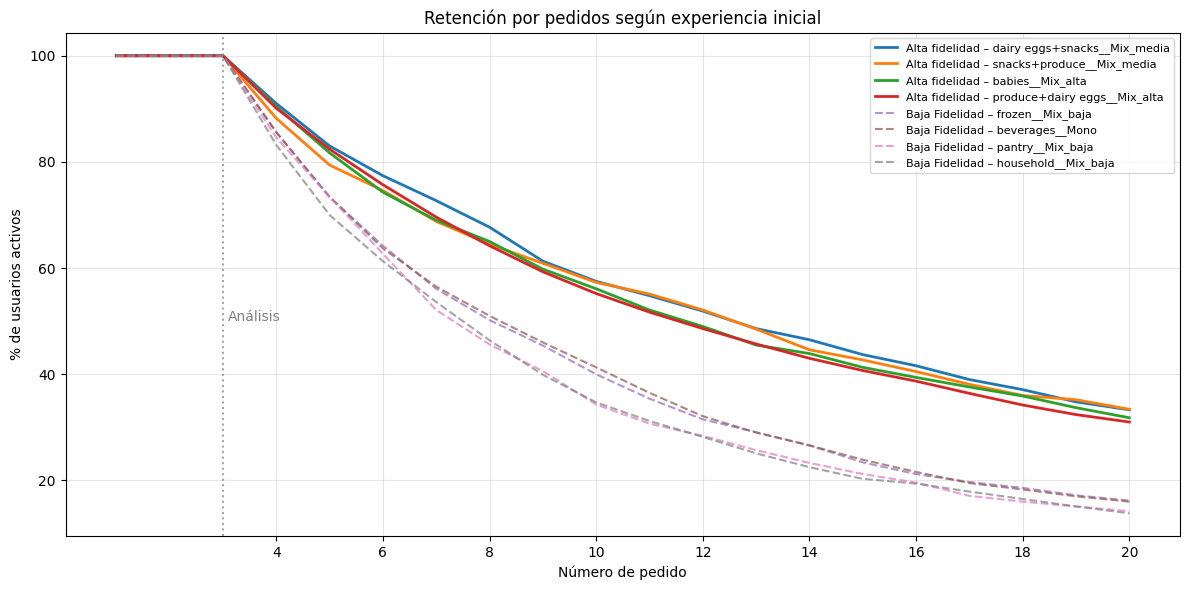


**Conclusión y Oportunidad:**


Alta Fidelidad: Usuarios que durante los primeros 3 pedidos compran con mixicidad Media o alta ( productos de más de 9 categorias diferentes) y la mayoria de sus productos pertenencen de las categorias dairy eggs, snack, produce y babies, suelen llegar al pedido 14. Comportamiento detectado: El 40% de este grupo llega al pedido 14.
 
Baja fidelidad: Usuarios que en sus primeros 3 pedidos compran con mixicidad baja o mono (de 1 cat), y adquieren, en su mayoria, productos de frozen, beverages, pantry o household. Comportamiento detectado: Solo el 20% de este grupo llega al pedido 14.

Diferencia: El grupo de Alta fidelidad duplica la permanencia con respecto al segmento de baja fidelidad. 

**Propuesta de acción:**
Realizar una detección temprana de las categorias relacionadas a <a> baja fidelidad</a>, y mediante promociones y descuentos motivar la mixicidad alta e linclusión de productos de las categorias relacionadas a <a>alta fidelidad</a>. Con el fin de aumentar la fidelidad del usuario.


Link a [Resolución:Análisis de cohorte]




_______________________________________________

#### Analisis de ventas y rentabilidad de las categorias


Dado que Instacart gana aproximadamente un 10% del valor de cada orden, la rentabilidad por categoría depende principalmente de la rentabilidad de los productos que la componen. Esto es, del volumen de pedidos en que participan, la recurrencia de compra y el valor de ticket promedio de tales productos.

**El objetivo en este punto es Identificar las categorías más rentables y aquellas con menor rendimiento.**





**Clusters de categoría**: Se realiza a través de un kmeans, tomando la tasa de reorder, el volumen de usuario que la compran, el ticket y los días promedio entre pedidos en que participan.

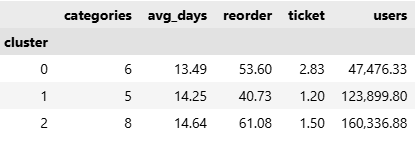

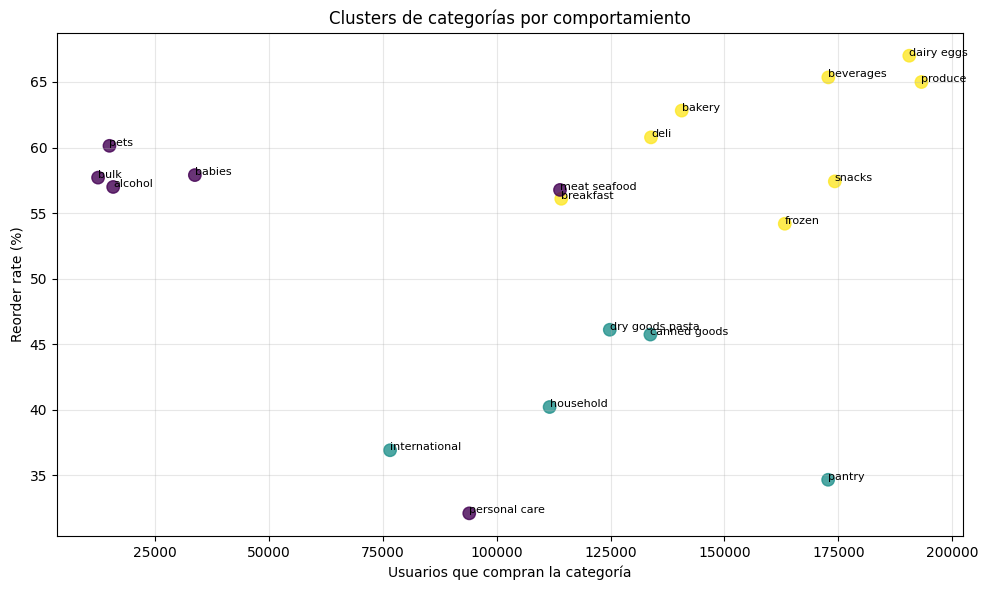 


En el siguiente cuadro podemos observar: La proporción de usarios registrados que consume cada categoría, La tasa de productos que se vuelven a ordenar ua vez comprados, y el ticket score de la categoría.


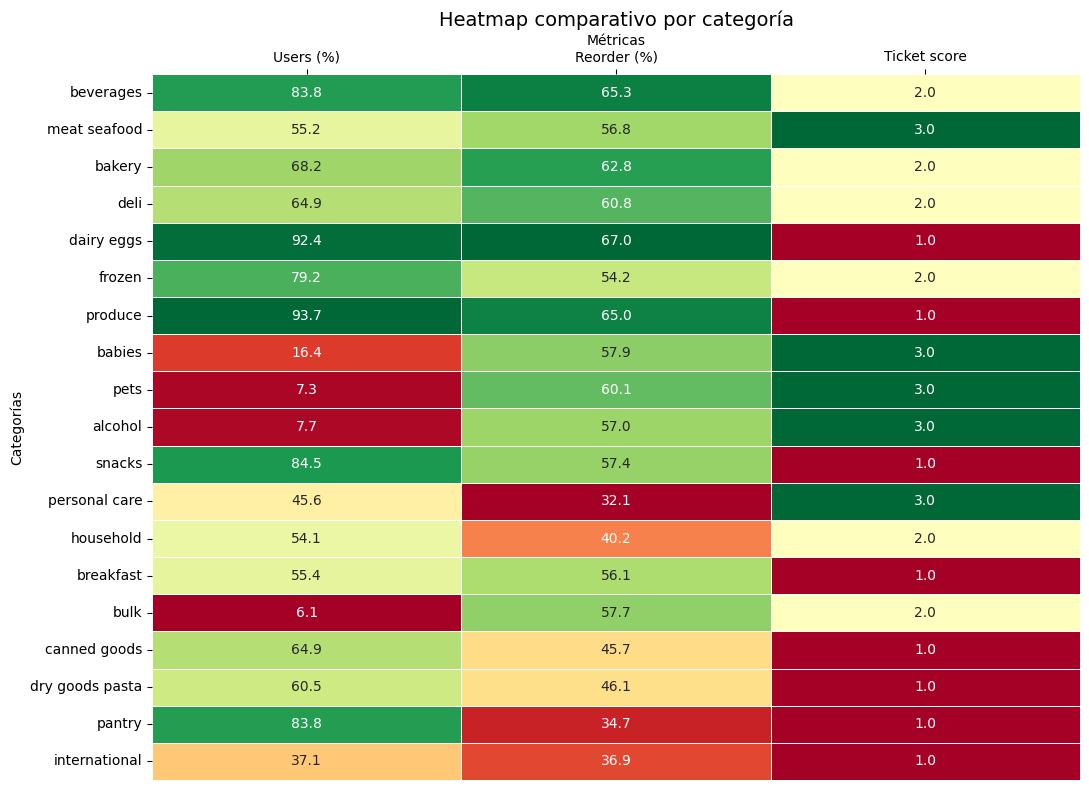




**Conclusión**


Bajo el criterio nombrado:

Beverages se posiciona como la categoría más rentable debido a su alta penetración(presencia en la mayoria de pedidos), elevada tasa de recompra y ticket medio. Meat & Seafood aporta alta rentabilidad por valor unitario, aunque con menor escala.

Pese a su bajo ticket, Produce y Dairy Eggs, resultan altamente rentables debido a su rol central en la frecuencia de compra y el volumen total de pedidos.

En contraste, International presenta el menor rendimiento relativo, combinando baja penetración, bajo ticket y baja recompra.



**Oportunidad**

Hoy, menos del 8% de los usarios incluyen en sus pedidos las categorías de babies, alcohol, pets y bulks. Siendo estas, categorías con alto ticket promedio y alto reorder, se podría incentivar la inclusión de las mismas en las ordenes habituales. Impactando así, el ticket medio por pedido, y de esta forma aumentando la rentabilidad de Instacart. Esto se podría realizar a través de descuentos y promociones intercategoricas.

En el caso de Personal Care, el cual presenta un bajo reorder y solo lo consume el 40% de los usarios, podría ser útil analizar porque no se repiten tanto los pedidos. Una posible causa podría ser que los locales registrados en la plataforma tienen malos productos o servicios. Si este fuera el caso, se podría ampliar la oferta de proovedores, para lograr un mayor reorder. A su vez, promocionar más la categoría para aumentar el porcentaje de usuarios que la consumen e impactar en el ticket promedio de las ordenes. 


[Resolución: Análisis de Ventas y rentabiliad](#### Resolución: Análisis de Ventas y rentabiliad)

__________________________________

#### Probabilidad de recompra en los proximos 30 dias


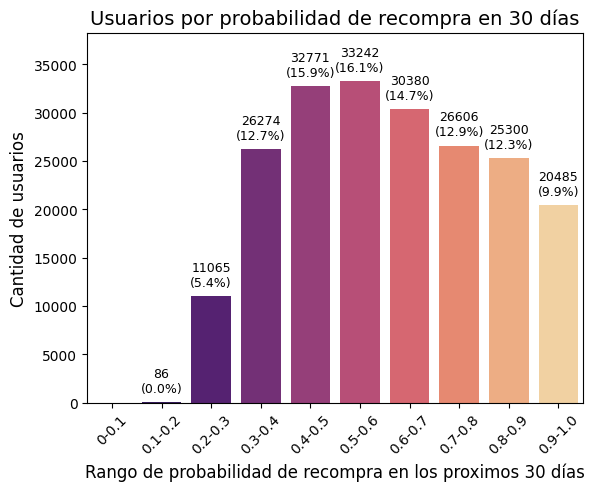




Elección del umbral y su impacto en la clasificación: 

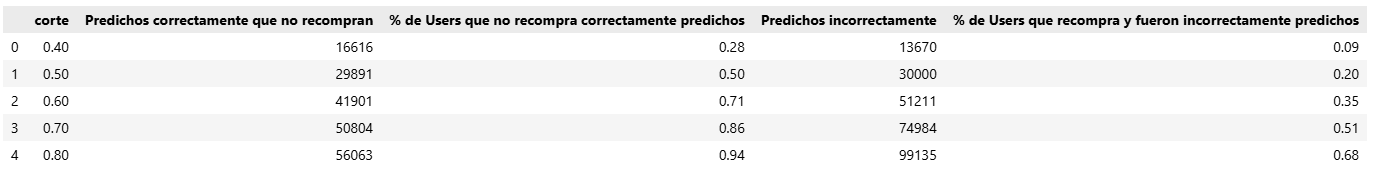


**Conclusión**


Con un umbral (threshold) de 0.60 logramos reconocer al 71% de los usuarios que no iban a recomprar dentro de los próximos 30 días (esto es el Recall de la clase 'No Compra'). Pero estaríamos clasificando incorrectamente a un 35% adicional de usuarios, que en realidad sí iban a comprar.
La decisión final del umbral a elegir depende del costo de la promoción a implementar versus el valor de retener a un cliente.”
 


**Oportunidad y Propuesta** 
Trabajar sobre la retención o el aumento de la frecuencia de compra, promocionando para incentivar el habito de productos que conlleven ordenes de frecuencia más corta. Y a la vez minimizar los costos y maximizar la ganancia **optimizando la siguiente ecuación**:



$$
\text{Ganancia} =
\underbrace{TN \cdot V_r}_{\text{retención efectiva}}
\;-\;
\underbrace{C_p \cdot (TN + FN)}_{\text{costo de promociones}}
$$



- $TN$: Usuarios que **no iban a comprar en 30 días** y fueron **correctamente identificados** por el modelo  
- $FN$: Usuarios que **iban a comprar en 30 días**, pero el modelo los clasificó erróneamente como inactivos  
- $V_r$: Valor económico de retener un usuario inactivo  
- $C_p$: Costo unitario de la promoción enviada




**Las características de los usuarios que más afectan la predicción**

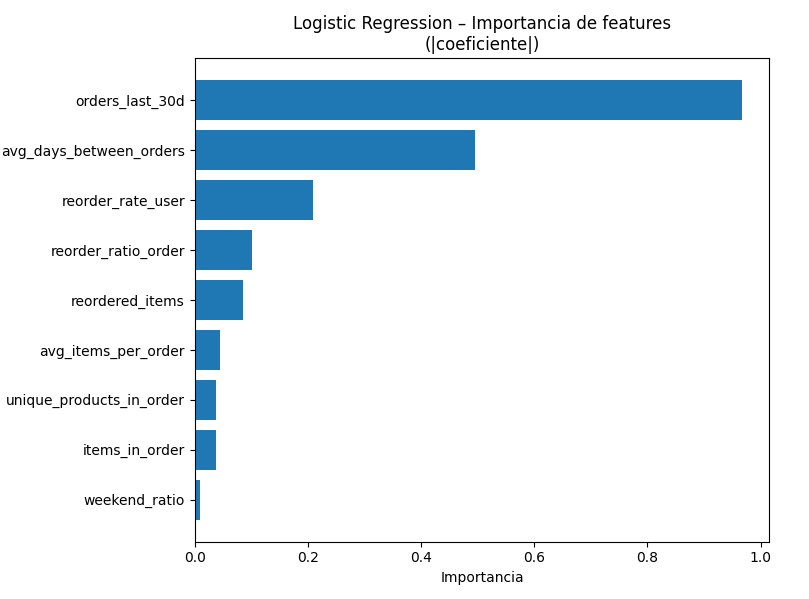



### Amazon Product Data - Ejercicio 3
 
Este conjunto de datos contiene información sobre productos musicales de Amazon, incluidas reseñas de clientes y calificaciones.

### Conclusiones - Amazon 

#### Sentimiento del Cliente


En el primer gráfico, cada código del eje Y, es un producto musical. Y en el eje X,  encontramos el sentiment score que va de -1 a 1. Donde -1 es negativo, 0 es neutro y 1 es positivo. El sentiment score lo realizamos en base a todos los reviews.

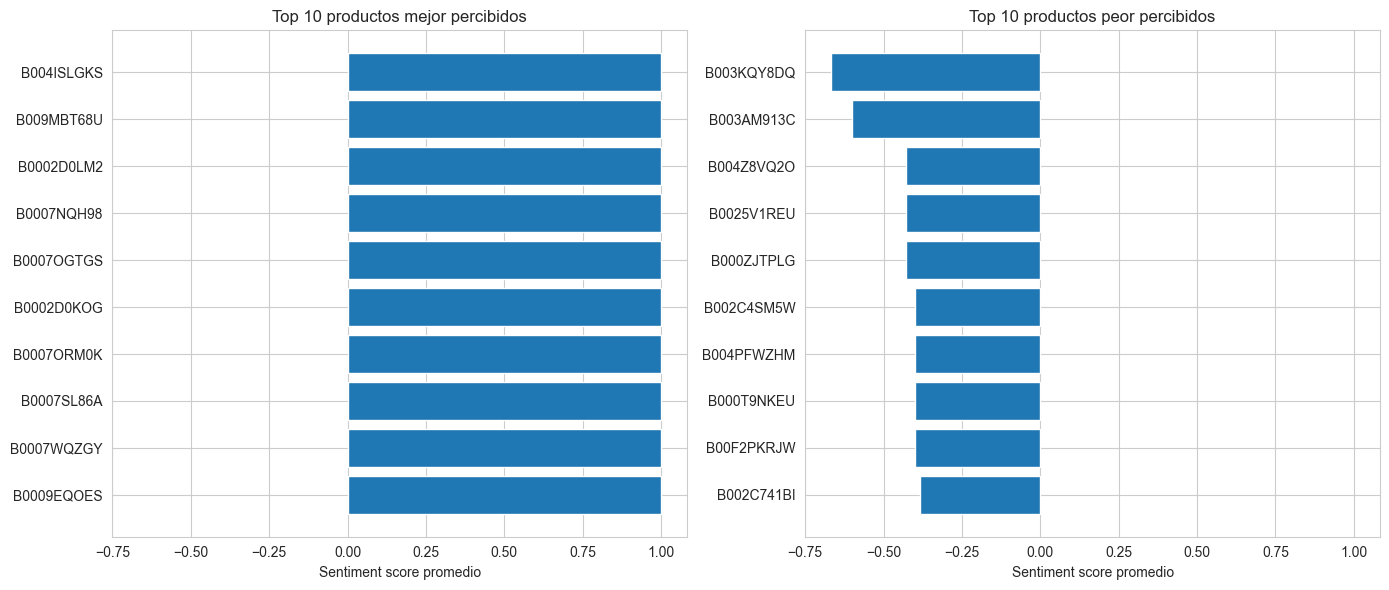

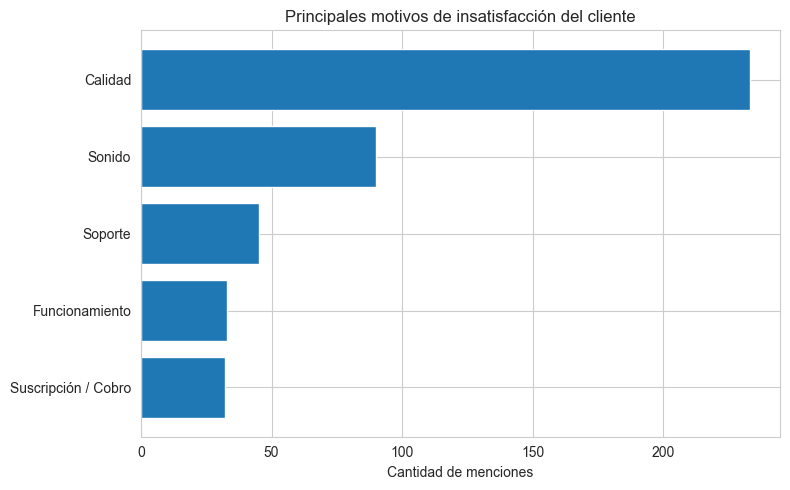

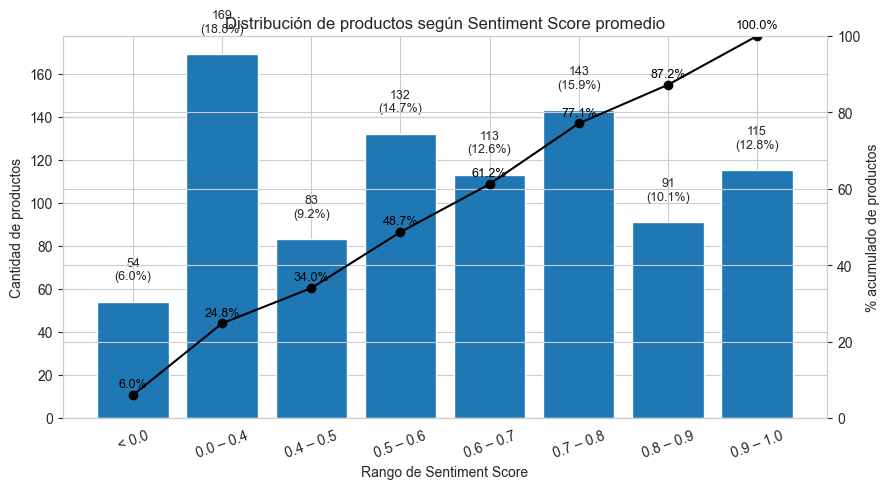

#### Conclusión

El análisis permitió identificar los productos con peor percepción del cliente, basandonos plenamente en los reviews. Y los principales motivos de insatisfacción asociados.

El análisis basado en reviews permitió identificar los productos con peor percepción del cliente y los principales focos de insatisfacción. Se observa que un 6% de los productos presenta una percepción negativa o neutra, mientras que un 28% se ubica en una zona de percepción neutral. El 66% restante muestra una percepción positiva, incluyendo un 12,8% de productos con reviews altamente favorables.


Se identifica una oportunidad de mejora sobre el 24,8% de los productos con peor percepción del cliente. Se propone focalizar acciones sobre este grupo, utilizando los comentarios negativos como insumo para mejorar la calidad, el funcionamiento y la experiencia de soporte, con el objetivo de elevar la percepción general del catálogo.

___________________________________

## Resolucion - Analisis de cohortes

##### Carga de dataframe

In [3]:
DB_PATH = "instacart.duckdb"
DATA_DIR = Path(r"C:\Users\Usuario\Downloads\Instacart")

files = {
    "orders": "orders.csv",
    "order_products__prior": "order_products__prior.csv",
    "order_products__train": "order_products__train.csv",
    "products": "products.csv",
    "departments": "departments.csv",
    "aisles": "aisles.csv",
}

with duckdb.connect(DB_PATH) as con:
    for table, fname in files.items():
        path = DATA_DIR / fname
        print(f"Creando tabla {table} desde {path}...")

        con.execute(f"""
            CREATE TABLE IF NOT EXISTS {table} AS
            SELECT * FROM read_csv_auto('{path.as_posix()}')
        """)

print("✔ Base creada (si no existía) y conexión cerrada.")


Creando tabla orders desde C:\Users\Usuario\Downloads\Instacart\orders.csv...
Creando tabla order_products__prior desde C:\Users\Usuario\Downloads\Instacart\order_products__prior.csv...
Creando tabla order_products__train desde C:\Users\Usuario\Downloads\Instacart\order_products__train.csv...
Creando tabla products desde C:\Users\Usuario\Downloads\Instacart\products.csv...
Creando tabla departments desde C:\Users\Usuario\Downloads\Instacart\departments.csv...
Creando tabla aisles desde C:\Users\Usuario\Downloads\Instacart\aisles.csv...
✔ Base creada (si no existía) y conexión cerrada.


In [4]:
## Inner Join
with duckdb.connect(DB_PATH) as con:
    query = con.execute(""" SELECT
        o.user_id,
        o.order_id,
        o.order_number,
        o.order_dow,
        o.order_hour_of_day,              
        op.product_id,
        d.department,
        op.reordered,
        o.days_since_prior_order                
    FROM orders o
    JOIN order_products__prior op   -- (detalle del carrito)
        ON o.order_id = op.order_id
    JOIN products p
        ON op.product_id = p.product_id
    JOIN departments d
        ON p.department_id = d.department_id
    """)
    data = query.fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

##### Exploratory Analysis

In [160]:
data.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,department,reordered,days_since_prior_order
0,202279,2,3,5,09,33120,dairy eggs,1,8.00
1,202279,2,3,5,09,28985,produce,1,8.00
2,202279,2,3,5,09,9327,pantry,0,8.00
3,202279,2,3,5,09,45918,pantry,1,8.00
4,202279,2,3,5,09,30035,pantry,0,8.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_id                int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       object 
 5   product_id              int64  
 6   department              object 
 7   reordered               int64  
 8   days_since_prior_order  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.2+ GB


In [7]:
# pedidos por usuario
orders_per_user = (
    data[["user_id", "order_id"]]
    .drop_duplicates()
    .groupby("user_id")
    .size()
    .reset_index(name="n_orders")
)

In [8]:
orders_per_user['n_orders'].describe()

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: n_orders, dtype: float64

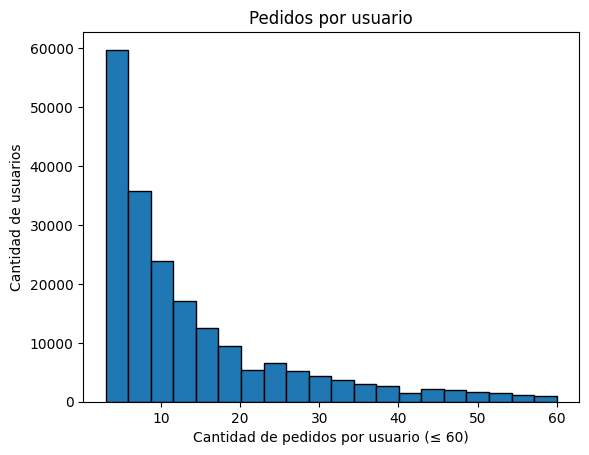

In [9]:
plt.figure()
plt.hist(
    orders_per_user.loc[orders_per_user["n_orders"] <= 60, "n_orders"],
    bins=20,
    edgecolor="black"
)
plt.xlabel("Cantidad de pedidos por usuario (≤ 60)")
plt.ylabel("Cantidad de usuarios")
plt.title("Pedidos por usuario")
plt.show()


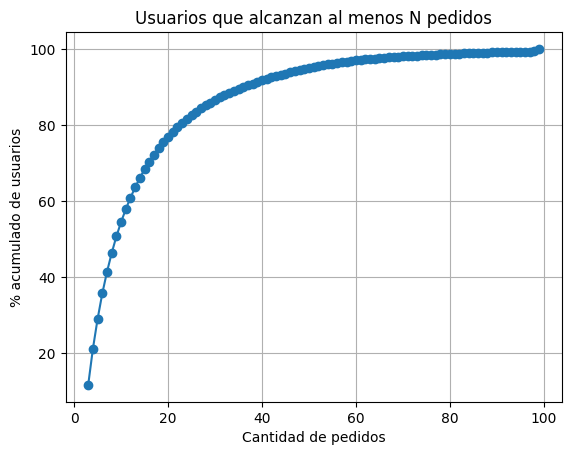

In [10]:


# frecuencia de usuarios por cantidad de pedidos
freq = (
    orders_per_user
    .groupby("n_orders")
    .size()
    .sort_index()
)

cum = freq.cumsum() / freq.sum() * 100

plt.figure()
plt.plot(cum.index, cum.values, marker="o")
plt.xlabel("Cantidad de pedidos")
plt.ylabel("% acumulado de usuarios")
plt.title("Usuarios que alcanzan al menos N pedidos")
plt.grid(True)
plt.show()


In [11]:
pd.options.display.float_format = '{:,.2f}'.format

cart_size = (
    data
    .groupby("order_id")
    .size()
    .reset_index(name="products_in_order") 
)

cart_size.products_in_order.describe()



count   3,214,874.00
mean           10.09
std             7.53
min             1.00
25%             5.00
50%             8.00
75%            14.00
max           145.00
Name: products_in_order, dtype: float64

entre 1 y 5 =  el percentil 25 es 5. Un cuarto de los pedidos no supera ese valor. 

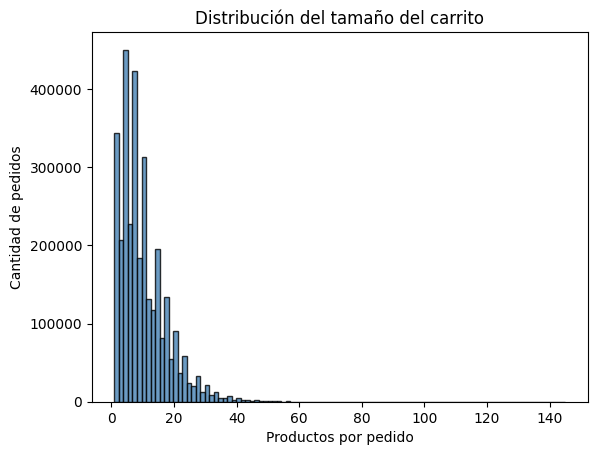

In [12]:
plt.figure()
plt.hist(
    cart_size["products_in_order"],
    bins=100,
    color="steelblue",
    edgecolor="black",
    alpha=0.8
)
plt.xlabel("Productos por pedido")
plt.ylabel("Cantidad de pedidos")
plt.title("Distribución del tamaño del carrito")
plt.show()

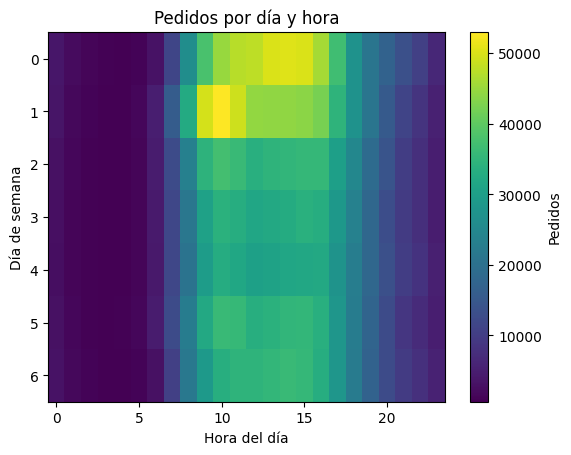

In [13]:
pivot = (
    data[["order_id", "order_dow", "order_hour_of_day"]]
    .drop_duplicates()
    .groupby(["order_dow", "order_hour_of_day"])
    .size()
    .reset_index(name="orders")
)

heat = pivot.pivot(
    index="order_dow",
    columns="order_hour_of_day",
    values="orders"
).fillna(0)

plt.figure()
plt.imshow(heat.values, aspect="auto")
plt.colorbar(label="Pedidos")
plt.xlabel("Hora del día")
plt.ylabel("Día de semana")
plt.title("Pedidos por día y hora")
plt.show()


In [14]:
mix_by_order = (
    data
    .groupby("order_id")["department"]
    .nunique()
    .reset_index(name="n_departments")
)

mix_by_order['n_departments'].describe()


count   3,214,874.00
mean            4.74
std             2.55
min             1.00
25%             3.00
50%             4.00
75%             6.00
max            18.00
Name: n_departments, dtype: float64

In [162]:
## N

mix_dist = (
    mix_by_order
    .groupby("n_departments")
    .size()
    .reset_index(name="orders")
    .sort_values("n_departments")
)


In [16]:
mix_dist["share_pct"] = (
    mix_dist["orders"] / mix_dist["orders"].sum() * 100
)

mix_dist

,n_departments,orders,share_pct
0,1,287948,8.96
1,2,395701,12.31
2,3,468955,14.59
3,4,488113,15.18
4,5,447455,13.92
5,6,367284,11.42
6,7,279920,8.71
7,8,198390,6.17
8,9,130101,4.05
9,10,78397,2.44


Interesante, saber que porcentaje ocupa cada mixicidad de categorias en los pedidos.  Vamos a ver que relación tiene con la fidelidad de los clientes. 

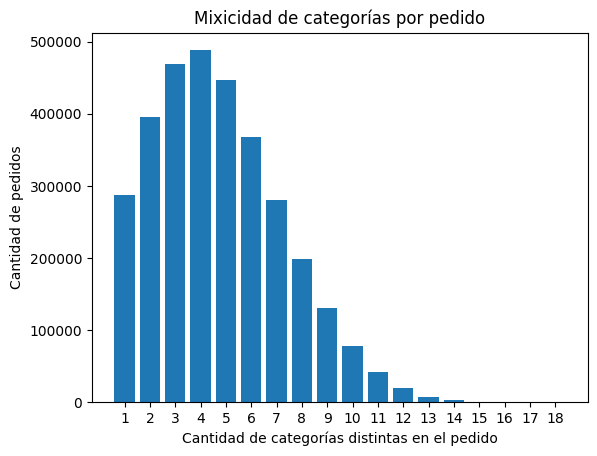

In [17]:
plt.figure()
plt.bar(mix_dist["n_departments"], mix_dist["orders"])
plt.xlabel("Cantidad de categorías distintas en el pedido")
plt.ylabel("Cantidad de pedidos")
plt.title("Mixicidad de categorías por pedido")
plt.xticks(mix_dist["n_departments"]) 
plt.show()


##### Generamos lo cohortes

In [18]:
data

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,department,reordered,days_since_prior_order
0,202279,2,3,5,09,33120,dairy eggs,1,8.00
1,202279,2,3,5,09,28985,produce,1,8.00
2,202279,2,3,5,09,9327,pantry,0,8.00
3,202279,2,3,5,09,45918,pantry,1,8.00
4,202279,2,3,5,09,30035,pantry,0,8.00
...,...,...,...,...,...,...,...,...,...
32434484,7370,3421068,2,4,16,6069,snacks,0,15.00
32434485,7370,3421068,2,4,16,48296,snacks,0,15.00
32434486,7370,3421068,2,4,16,19382,snacks,0,15.00
32434487,7370,3421068,2,4,16,9175,beverages,0,15.00


In [19]:
# Me quedo con los primeros 3 pedidos de cada usuario.
data_1_3 = data[data["order_number"].isin([1, 2, 3])].copy()

data_1_3_unique = (
    data_1_3
    .drop_duplicates(subset=["user_id", "product_id", "department"])
)



In [20]:
# Cuento los productos por categorias y por usuario
dept_counts = (
    data_1_3_unique
    .groupby(["user_id", "department"])
    .size()
    .reset_index(name="n_unique_products_de_categoria")
)

In [21]:

# suma de productos usuario.
dept_counts["total_unique_products"] = (
    dept_counts
    .groupby("user_id")["n_unique_products_de_categoria"]
    .transform("sum")
)
# Calculo el % que representa cada categoria por usuario en sus 3 primeras ordenes
dept_counts["share"] = (
    dept_counts["n_unique_products_de_categoria"] / dept_counts["total_unique_products"]
)

# Me quedo con las 3 categorias top por usuario
dept_top3 = (
    dept_counts
    .sort_values(["user_id", "share"], ascending=[True, False])
    .groupby("user_id")
    .head(3)
    .copy()
)



In [22]:
dept_counts

,user_id,department,n_unique_products_de_categoria,total_unique_products,share
0,1,beverages,1,10,0.10
1,1,breakfast,1,10,0.10
2,1,dairy eggs,2,10,0.20
3,1,household,1,10,0.10
4,1,pantry,1,10,0.10
...,...,...,...,...,...
1596683,206209,household,2,23,0.09
1596684,206209,meat seafood,1,23,0.04
1596685,206209,pantry,1,23,0.04
1596686,206209,produce,2,23,0.09


In [23]:
dept_top3

,user_id,department,n_unique_products_de_categoria,total_unique_products,share
6,1,snacks,3,10,0.30
2,1,dairy eggs,2,10,0.20
0,1,beverages,1,10,0.10
12,2,snacks,6,20,0.30
9,2,deli,5,20,0.25
...,...,...,...,...,...
1596669,206208,dairy eggs,5,26,0.19
1596668,206208,bakery,2,26,0.08
1596681,206209,dairy eggs,6,23,0.26
1596679,206209,breakfast,3,23,0.13


In [24]:
## Categorias dominantes por usuario

def assign_dominant_categories_top3(df):
    df = df.sort_values("share", ascending=False).reset_index(drop=True)

    selected = [df.loc[0, "department"]]
    prev_share = df.loc[0, "share"]

    for i in range(1, min(3, len(df))):
        cur_share = df.loc[i, "share"]
        if cur_share >= 0.20 and (prev_share - cur_share) <= 0.20: ## Para quedarme con las categorias resamente más potentes
            selected.append(df.loc[i, "department"])
            prev_share = cur_share
        else:
            break

    return "+".join(selected)


In [25]:
cohorte_cat = (
    dept_counts
    .groupby("user_id")
    .apply(assign_dominant_categories_top3)
    .reset_index(name="dominant_categories")
)


In [26]:
cohorte_cat

,user_id,dominant_categories
0,1,snacks+dairy eggs
1,2,snacks+deli+produce
2,3,produce
3,4,bakery
4,5,produce
...,...,...
206204,206205,dairy eggs
206205,206206,frozen
206206,206207,produce
206207,206208,produce


In [27]:
mixicity = (
    data_1_3_unique
    .groupby("user_id")["department"]
    .nunique()
    .reset_index(name="n_departments_total")
)

def mixicity_clasiffier(n):   # Criterio en base a distribucion mix_dist
    if n == 1:
        return "Mono"
    elif n <= 5:
        return "Mix_baja"
    elif n <= 9:
        return "Mix_media"
    else:
        return "Mix_alta"
mixicity["mixicity_level"] = mixicity["n_departments_total"].apply(mixicity_clasiffier)

In [28]:
mixicity

,user_id,n_departments_total,mixicity_level
0,1,7,Mix_media
1,2,6,Mix_media
2,3,6,Mix_media
3,4,7,Mix_media
4,5,7,Mix_media
...,...,...,...
206204,206205,9,Mix_media
206205,206206,3,Mix_baja
206206,206207,12,Mix_alta
206207,206208,9,Mix_media


In [29]:
mixicity

,user_id,n_departments_total,mixicity_level
0,1,7,Mix_media
1,2,6,Mix_media
2,3,6,Mix_media
3,4,7,Mix_media
4,5,7,Mix_media
...,...,...,...
206204,206205,9,Mix_media
206205,206206,3,Mix_baja
206206,206207,12,Mix_alta
206207,206208,9,Mix_media


In [30]:
cohortes = cohorte_cat.merge(mixicity, on="user_id", how="left")


In [31]:
cohortes["cohort_label"] = cohortes["dominant_categories"] + "__" + cohortes["mixicity_level"]


In [32]:
cohortes

,user_id,dominant_categories,n_departments_total,mixicity_level,cohort_label
0,1,snacks+dairy eggs,7,Mix_media,snacks+dairy eggs__Mix_media
1,2,snacks+deli+produce,6,Mix_media,snacks+deli+produce__Mix_media
2,3,produce,6,Mix_media,produce__Mix_media
3,4,bakery,7,Mix_media,bakery__Mix_media
4,5,produce,7,Mix_media,produce__Mix_media
...,...,...,...,...,...
206204,206205,dairy eggs,9,Mix_media,dairy eggs__Mix_media
206205,206206,frozen,3,Mix_baja,frozen__Mix_baja
206206,206207,produce,12,Mix_alta,produce__Mix_alta
206207,206208,produce,9,Mix_media,produce__Mix_media


In [33]:
# PASO 1 — Filtrar cohortes con masa crítica (≥ 1000)
MIN_USERS = 500

# Tamaño de cohortes
cohort_sizes = (
    cohortes.groupby("cohort_label")["user_id"]
    .nunique()
    .reset_index(name="n_users")
)

# Cohortes válidas
valid_cohorts = cohort_sizes.loc[
    cohort_sizes["n_users"] >= MIN_USERS, "cohort_label"
]

cohortes_valid = cohortes[cohortes["cohort_label"].isin(valid_cohorts)].copy()

print("Cohortes válidas:", cohortes_valid["cohort_label"].nunique())
print(cohort_sizes.sort_values("n_users", ascending=False).head())

Cohortes válidas: 49
                       cohort_label  n_users
2991             produce__Mix_media    32229
2989              produce__Mix_alta    27882
2990              produce__Mix_baja    14458
1532           dairy eggs__Mix_alta     8354
2837  produce+dairy eggs__Mix_media     7351


In [34]:
cohort_sizes

,cohort_label,n_users
0,alcohol+babies+beverages__Mix_baja,2
1,alcohol+babies+dairy eggs__Mix_baja,1
2,alcohol+babies+dairy eggs__Mix_media,1
3,alcohol+babies+snacks__Mix_media,1
4,alcohol+babies__Mix_baja,2
...,...,...
3201,snacks+produce__Mix_media,583
3202,snacks__Mix_alta,2588
3203,snacks__Mix_baja,2551
3204,snacks__Mix_media,2651


In [35]:


# 2.1 Máximo pedido por usuario
user_max = (
    data.groupby("user_id")["order_number"]
    .max()
    .reset_index(name="max_order_number")
)


In [38]:
user_max

,user_id,max_order_number
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


##### Armo la matriz con los cohortes

In [39]:


## Matriz (% usuarios de cohorte que alcanzan pedido N)

# Unir cohortes válidas con max_order_number
cohort_user_max = (
    cohortes_valid[["user_id", "cohort_label"]]
    .merge(user_max, on="user_id", how="left")
)

# Tamaño de cohorte
cohort_size = (
    cohort_user_max.groupby("cohort_label")["user_id"]
    .nunique()
    .rename("cohort_size")
)

# Elegí hasta qué pedido querés columnas
MAX_ORDER = int(cohort_user_max["max_order_number"].max())
MAX_ORDER = min(MAX_ORDER, 20)  

# Retención acumulado por cohorte. % de usuarios que llegan a N


ret_rows = []
for n in range(1, MAX_ORDER + 1):
    tmp = (
        cohort_user_max.assign(reached=(cohort_user_max["max_order_number"] >= n).astype(int)) ## llego al pedido n o no? 1 o 0
        .groupby("cohort_label")["reached"]
        .mean() # La proporción de usuarios que llegaron al pedido n
        .mul(100)
        .rename(n)
    ) # Guardo series, cada serie es un n con los datos de cada porcentaje de cada cohorte.
    ret_rows.append(tmp) # lista de series

cohort_matrix = pd.concat(ret_rows, axis=1).round(1)

# Ordenar cohortes por retención en pedido 20
if 20 in cohort_matrix.columns:
    cohort_matrix = cohort_matrix.sort_values(by=20, ascending=False)

cohort_matrix


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort_label,,,,,,,,,,,,,,,,,,,,
snacks+produce__Mix_media,100.00,100.00,100.00,88.20,79.40,74.60,68.80,64.50,60.90,57.30,55.10,52.10,48.50,44.60,42.70,40.50,38.10,36.00,35.20,33.40
dairy eggs+snacks__Mix_media,100.00,100.00,100.00,91.00,83.00,77.40,72.70,67.70,61.30,57.50,54.80,51.90,48.60,46.50,43.70,41.60,39.00,37.10,34.80,33.30
babies__Mix_alta,100.00,100.00,100.00,90.40,81.70,74.30,69.00,65.00,59.80,56.10,52.10,49.00,45.50,43.90,41.30,39.40,37.60,35.90,33.70,31.80
produce+dairy eggs__Mix_alta,100.00,100.00,100.00,90.10,82.40,75.70,69.60,64.20,59.30,55.20,51.70,48.60,45.70,43.00,40.70,38.70,36.40,34.20,32.40,31.00
produce+snacks__Mix_alta,100.00,100.00,100.00,89.90,80.80,72.80,66.50,61.80,56.70,53.30,49.70,46.30,43.30,40.00,37.70,36.50,34.70,33.20,31.30,29.90
produce+dairy eggs__Mix_media,100.00,100.00,100.00,89.70,80.70,73.70,67.80,62.30,57.70,53.70,49.60,46.00,43.10,40.60,38.10,35.90,33.90,32.00,30.40,28.70
produce+snacks__Mix_baja,100.00,100.00,100.00,90.00,81.60,73.90,67.00,61.00,58.00,52.90,49.00,45.50,42.50,39.70,38.10,36.20,34.10,32.10,30.50,28.60
beverages+snacks__Mix_media,100.00,100.00,100.00,90.10,82.10,74.10,67.40,62.60,58.00,53.40,49.50,45.40,43.10,41.00,39.00,37.20,34.60,32.60,30.30,28.50
dairy eggs+produce__Mix_alta,100.00,100.00,100.00,90.30,82.10,75.10,68.70,62.00,57.10,52.10,48.60,45.20,43.00,40.40,38.00,35.90,33.50,31.50,29.70,28.40


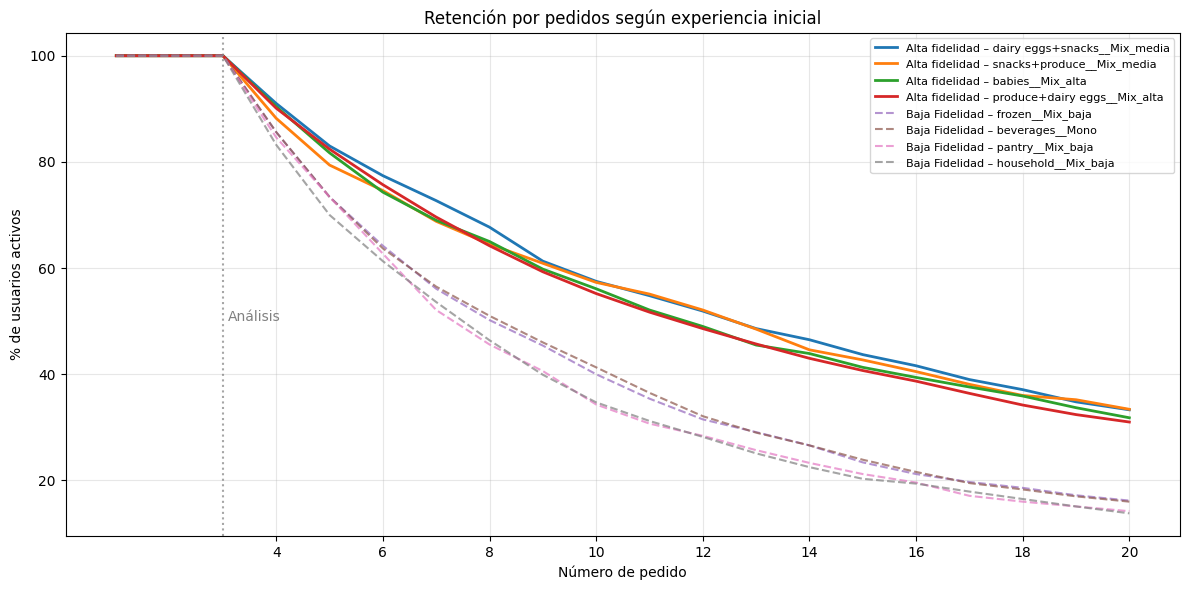

In [40]:
# Elegimos pedido de referencia
ORDER_REF = 14

# Ordenamos
cm_sorted = cohort_matrix.copy()
cm_sorted.columns = cm_sorted.columns.astype(int)
cm_sorted = cm_sorted.sort_values(by=ORDER_REF, ascending=False)

top = cm_sorted.head(4)
bottom = cm_sorted.tail(4)

plt.figure(figsize=(12, 6))

for label, row in top.iterrows():
    plt.plot(row.index, row.values, linewidth=2, label=f"Alta fidelidad – {label}")

for label, row in bottom.iterrows():
    plt.plot(row.index, row.values, linestyle="--", alpha=0.7, label=f"Baja Fidelidad – {label}")

plt.axvline(x=3, color="gray", linestyle=":", alpha=0.7)
plt.text(3.1, 50, "Análisis", color="gray")


x = cohort_matrix.columns.astype(int)

step = 2  # cada 2 pedidos

plt.xticks(
    ticks=x[3::step],
    labels=x[3::step]
)


plt.xlabel("Número de pedido")
plt.ylabel("% de usuarios activos")
plt.title("Retención por pedidos según experiencia inicial")

plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### Conclusion y Oportunidad


Alta Fidelidad: Usuarios que durante los primeros 3 pedidos compran con mixicidad Media o alta ( productos de más de 9 categorias diferentes) y la mayoria de sus productos pertenencen de las categorias dairy eggs, snack, produce y babies, suelen llegar al pedido 14. Comportamiento detectado: El 40% de este grupo llega al pedido 14.
 
Baja fidelidad: Usuarios que en sus primeros 3 pedidos compran con mixicidad baja o mono (de 1 cat), y adquieren, en su mayoria, productos de frozen, beverages, pantry o household. Comportamiento detectado: Solo el 20% de este grupo llega al pedido 14.

Diferencia: El grupo de Alta fidelidad duplica la permanencia con respecto al segmento de baja fidelidad. 

##### Propuesta de acción
Realizar una detección temprana de las categorias relacionadas a <a> baja fidelidad</a>, y mediante promociones y descuentos motivar la mixicidad alta e linclusión de productos de las categorias relacionadas a <a>alta fidelidad</a>. Con el fin de aumentar la fidelidad del usuario.


## Resolución - Analisis de Ventas y rentabiliad

##### Volumen de pedidos
Ranking de Categorias con mayor cantidad de productos vendidos y presentes en más orden, y comprados por más usuarios en el periodo analizado. 

In [41]:
sales_by_category = (
    data.groupby("department")
    .agg(
        orders=("order_id", "nunique"),
        products_sold=("product_id", "count"),
        users=("user_id", "nunique")
    )
    .reset_index()
    .sort_values("products_sold", ascending=False)
)


In [42]:
## Orders, produts y users por categoría
sales_by_category

,department,orders,products_sold,users
19,produce,2409320,9479291,193237
7,dairy eggs,2177338,5414016,190565
20,snacks,1391447,2887550,174219
3,beverages,1457351,2690129,172795
10,frozen,1181018,2236432,163233
16,pantry,1117892,1875577,172755
2,bakery,881556,1176787,140612
6,canned goods,681305,1068058,133733
8,deli,770300,1051249,133865
9,dry goods pasta,597862,866627,124820


In [43]:
total_orders = data["order_id"].nunique()

penetration = (
    data.groupby("department")["order_id"]
    .nunique()
    .div(total_orders) ## divido por total orders
    .mul(100) # paso a porcentaje
    .reset_index(name="order_penetration_pct")
)


##### Penetración de las categorías
Porcentaje de pedidos que aparece cada categoría

In [44]:
penetration.sort_values("order_penetration_pct", ascending=False)

,department,order_penetration_pct
19,produce,74.94
7,dairy eggs,67.73
3,beverages,45.33
20,snacks,43.28
10,frozen,36.74
16,pantry,34.77
2,bakery,27.42
8,deli,23.96
6,canned goods,21.19
9,dry goods pasta,18.60



##### Reorder rate por pedido
Con reorder decimos:  el usuario ya lo había pedido en una orden anterior. 

In [45]:
reorder_rate = (
    data.groupby("department")["reordered"]
    .mean()
    .mul(100)
    .reset_index(name="reorder_rate_pct")
)


In [46]:
reorder_rate.sort_values("reorder_rate_pct", ascending=False)

,department,reorder_rate_pct
7,dairy eggs,67.00
3,beverages,65.35
19,produce,64.99
2,bakery,62.81
8,deli,60.77
18,pets,60.13
1,babies,57.90
5,bulk,57.70
20,snacks,57.42
0,alcohol,56.99


##### Rentabilidad en Instacart

Instacart se queda, en promedio, con el 10.1% del valor total de la compra.

¿De dónde sale ese porcentaje? (Componentes variables)
Ese ~10% no sale de la suma de cuatro fuentes:
Comisión del Minorista (5% - 10%): La tienda (ej. Walmart, Kroger) le paga a Instacart un porcentaje por cada venta realizada a través de la app.
Tarifa de Servicio (5% - 15%): Es el cargo variable que ves en tu recibo. Si el pedido es pequeño, el porcentaje suele ser más alto para cubrir costos mínimos.
Sobreprecio de Productos (Markup): Si el producto cuesta $10 en tienda y la app te lo cobra a $11.50, ese 15% de diferencia es margen directo para la plataforma (o compartido con el retail).

Fuentes: https://miracuves.com/blog/instacart-revenue-model/


##### Estimación de margen por categoría
High-Ticket Categories (Highest Price per Unit):

Estimado con Gemini. Generado a partir de fuentes como: 
- Reportes de Resultados de Instacart (Q1-Q3 2025): https://share.google/w6EuvE5pRutbS6GJF
- Informes de consultoras como eMarketer y Brick Meets Click sobre el desempeño de Instacart en 2025


In [47]:
data.department.unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [48]:
tickets = [
    ("alcohol", "Alto"),
    ("pets", "Alto"),
    ("personal care", "Alto"),
    ("meat seafood", "Alto"),
    ("babies", "Alto"),

    ("household", "Medio"),
    ("bulk", "Medio"),
    ("deli", "Medio"),
    ("bakery", "Medio"),
    ("frozen", "Medio"),
    ("beverages", "Medio"),

    ("pantry", "Bajo"),
    ("international", "Bajo"),
    ("breakfast", "Bajo"),
    ("canned goods", "Bajo"),
    ("produce", "Bajo"),
    ("dry goods pasta", "Bajo"),
    ("snacks", "Bajo"),
    ("dairy eggs", "Bajo"),
]

df_ticket = pd.DataFrame(
    tickets,
    columns=["department", "ticket_promedio"]
)

df_ticket


,department,ticket_promedio
0,alcohol,Alto
1,pets,Alto
2,personal care,Alto
3,meat seafood,Alto
4,babies,Alto
5,household,Medio
6,bulk,Medio
7,deli,Medio
8,bakery,Medio
9,frozen,Medio


In [49]:

### Analizamos la frecuencia de compra de cada categoria para cada usuario.

# Frecuencia por usuario (días promedio entre pedidos)
user_freq = (
    data[["user_id", "order_id", "days_since_prior_order"]]
    .drop_duplicates()
    .dropna(subset=["days_since_prior_order"])   # excluye 1er pedido
    .groupby("user_id")["days_since_prior_order"]
    .mean()
    .reset_index(name="avg_days_between_orders_user")
)

# -------------------------
# Usuarios que compraron cada categoría (presencia)
# -------------------------
user_category = (
    data[["user_id", "department"]]
    .drop_duplicates()
)

# Asignamos a cada (usuario, categoría) la frecuencia del usuario
user_category_freq = user_category.merge(user_freq, on="user_id", how="left")


In [50]:
user_category_freq

,user_id,department,avg_days_between_orders_user
0,202279,dairy eggs,21.57
1,202279,produce,21.57
2,202279,pantry,21.57
3,205970,dairy eggs,9.21
4,205970,produce,9.21
...,...,...,...
2232784,204705,beverages,27.00
2232785,138530,missing,7.59
2232786,161089,personal care,8.88
2232787,118506,meat seafood,6.69


##### Métricas a nivel categoría

In [51]:

# Frecuencia por categoría: mediana y media (mediana recomendada)
category_frequency = (
    user_category_freq
    .groupby("department")
    .agg(
        users=("user_id", "nunique"),
        avg_days_mean=("avg_days_between_orders_user", "mean"),
        avg_days_median=("avg_days_between_orders_user", "median"),
    )
    .reset_index()
)

# Reorder rate por categoría (considera productos)

category_reorder = (
    data.groupby("department")["reordered"]
    .mean()
    .mul(100)
    .reset_index(name="reorder_rate_pct")
)

### Estas de mixicidad al final no lo uso.
#Mixicidad por categoría (cantidad de categorias por pedido). Departments únicos por order
order_mix = (
    data[["order_id", "department"]]
    .drop_duplicates()
    .groupby("order_id")["department"]
    .nunique()
    .reset_index(name="order_mixicity")
)

# Para cada categoría, promediamos mixicidad de los pedidos en los que aparece
cat_order = data[["order_id", "department"]].drop_duplicates()
cat_mix = (
    cat_order.merge(order_mix, on="order_id", how="left")
    .groupby("department")["order_mixicity"]
    .mean()
    .reset_index(name="avg_order_mixicity_when_present")
)

# -------------------------
# 1E) Ticket relativo (tu tabla)
# df_ticket: department, ticket_promedio en {'Bajo','Medio','Alto'}
# -------------------------
ticket_map = {"Bajo": 1, "Medio": 2, "Alto": 3}
df_ticket = df_ticket.copy()
df_ticket["ticket_score"] = df_ticket["ticket_promedio"].map(ticket_map)

# -------------------------
# 1F) Tabla final por categoría
# -------------------------
cat_metrics = (
    category_frequency
    .merge(category_reorder, on="department", how="left")
    .merge(cat_mix, on="department", how="left")
    .merge(df_ticket[["department", "ticket_promedio", "ticket_score"]], on="department", how="left")
)



In [52]:
# Limpieza mínima: si faltan tickets para alguna categoría, podés dejarlas fuera:
cat_metrics = cat_metrics.dropna(subset=["avg_days_median", "ticket_score"])

In [53]:
cat_metrics

,department,users,avg_days_mean,avg_days_median,reorder_rate_pct,avg_order_mixicity_when_present,ticket_promedio,ticket_score
0,alcohol,15798,14.37,13.60,56.99,5.05,Alto,3.00
1,babies,33730,12.78,11.61,57.90,6.99,Alto,3.00
2,bakery,140612,14.44,13.67,62.81,6.62,Medio,2.00
3,beverages,172795,14.78,14.00,65.35,5.68,Medio,2.00
4,breakfast,114169,14.08,13.19,56.09,6.82,Bajo,1.00
5,bulk,12484,11.94,10.47,57.70,6.55,Medio,2.00
6,canned goods,133733,14.51,13.75,45.74,6.86,Bajo,1.00
7,dairy eggs,190565,14.95,14.25,67.00,5.57,Bajo,1.00
8,deli,133865,14.37,13.57,60.77,6.64,Medio,2.00
9,dry goods pasta,124820,14.36,13.56,46.11,7.08,Bajo,1.00


In [54]:
cat_matrix = cat_metrics[["department","users", "avg_days_mean", "reorder_rate_pct", "ticket_promedio", "ticket_score"]].copy()
total_users = data["user_id"].nunique()
cat_matrix["Users_pct"] = cat_matrix["users"] / total_users * 100

cat_matrix.sort_values(["reorder_rate_pct", "ticket_promedio"], ascending=[False, True])

cat_matrix.reindex(columns=["department", "Users_pct", "avg_days_mean", "reorder_rate_pct", "ticket_promedio", "ticket_score"])

,department,Users_pct,avg_days_mean,reorder_rate_pct,ticket_promedio,ticket_score
0,alcohol,7.66,14.37,56.99,Alto,3.00
1,babies,16.36,12.78,57.90,Alto,3.00
2,bakery,68.19,14.44,62.81,Medio,2.00
3,beverages,83.80,14.78,65.35,Medio,2.00
4,breakfast,55.37,14.08,56.09,Bajo,1.00
5,bulk,6.05,11.94,57.70,Medio,2.00
6,canned goods,64.85,14.51,45.74,Bajo,1.00
7,dairy eggs,92.41,14.95,67.00,Bajo,1.00
8,deli,64.92,14.37,60.77,Medio,2.00
9,dry goods pasta,60.53,14.36,46.11,Bajo,1.00


##### Clusters

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


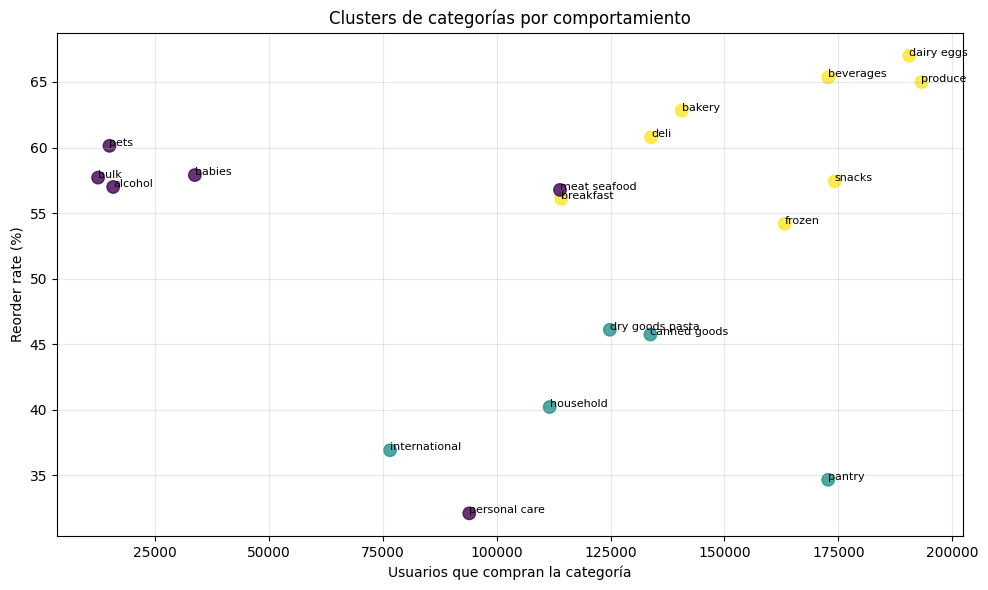

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = cat_metrics
features = df[["avg_days_mean", "reorder_rate_pct", "users", "ticket_score"]]

# Escalamos

features = df[["avg_days_mean", "reorder_rate_pct", "ticket_score"]].copy()
features["log_users"] = np.log1p(df["users"]) # Achico los grandes. Para reducir distancias.





X = StandardScaler().fit_transform(features)


weights = np.array([
    2.2,  # ticket_score (máxima prioridad)
    1.8,  # reorder_rate_pct
    2.0,  # users (log)
    0.2   # avg_days_mean (menor peso)
])

X_weighted = X * weights


# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_weighted)

plt.figure(figsize=(10, 6))
plt.scatter(
    df["users"],
    df["reorder_rate_pct"],
    c=df["cluster"],
    s=80,
    alpha=0.8
)

for _, r in df.iterrows():
    plt.text(
        r["users"],
        r["reorder_rate_pct"],
        r["department"],
        fontsize=8
    )

plt.xlabel("Usuarios que compran la categoría")
plt.ylabel("Reorder rate (%)")
plt.title("Clusters de categorías por comportamiento")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [57]:
cluster_profile = (
    df.groupby("cluster")
      .agg(
          categories=("department", "count"),
          avg_days=("avg_days_mean", "mean"),
          reorder=("reorder_rate_pct", "mean"),
          ticket=("ticket_score", "mean"),
          users=("users", "mean")
      )
)

cluster_profile

,categories,avg_days,reorder,ticket,users
cluster,,,,,
0,6,13.49,53.60,2.83,"47,476.33"
1,5,14.25,40.73,1.20,"123,899.80"
2,8,14.64,61.08,1.50,"160,336.88"


##### Heatmap

In [58]:
import seaborn as sns

# Base numérica
base = cat_matrix.set_index("department")[
    ["Users_pct", "reorder_rate_pct", "avg_days_mean", "ticket_score"]
].copy()

# Normalización SOLO para el color
def minmax(s):
    return (s - s.min()) / (s.max() - s.min())

heatmap_norm = pd.DataFrame({
    "Users (%)": minmax(base["Users_pct"]),
    "Reorder (%)": minmax(base["reorder_rate_pct"]),
    #"Frecuencia (inv)": 1 - minmax(base["avg_days_mean"]),
    "Ticket score": minmax(base["ticket_score"])
})

# Dataframe con valores reales para anotar
annot_vals = pd.DataFrame({
    "Users (%)": base["Users_pct"].round(1),
    "Reorder (%)": base["reorder_rate_pct"].round(1),
   # "Frecuencia (días)": base["avg_days_mean"].round(1),
    "Ticket score": base["ticket_score"]
})

# Ordenamos por performance general
order = heatmap_norm.mean(axis=1).sort_values(ascending=False).index
heatmap_norm = heatmap_norm.loc[order]
annot_vals = annot_vals.loc[order]



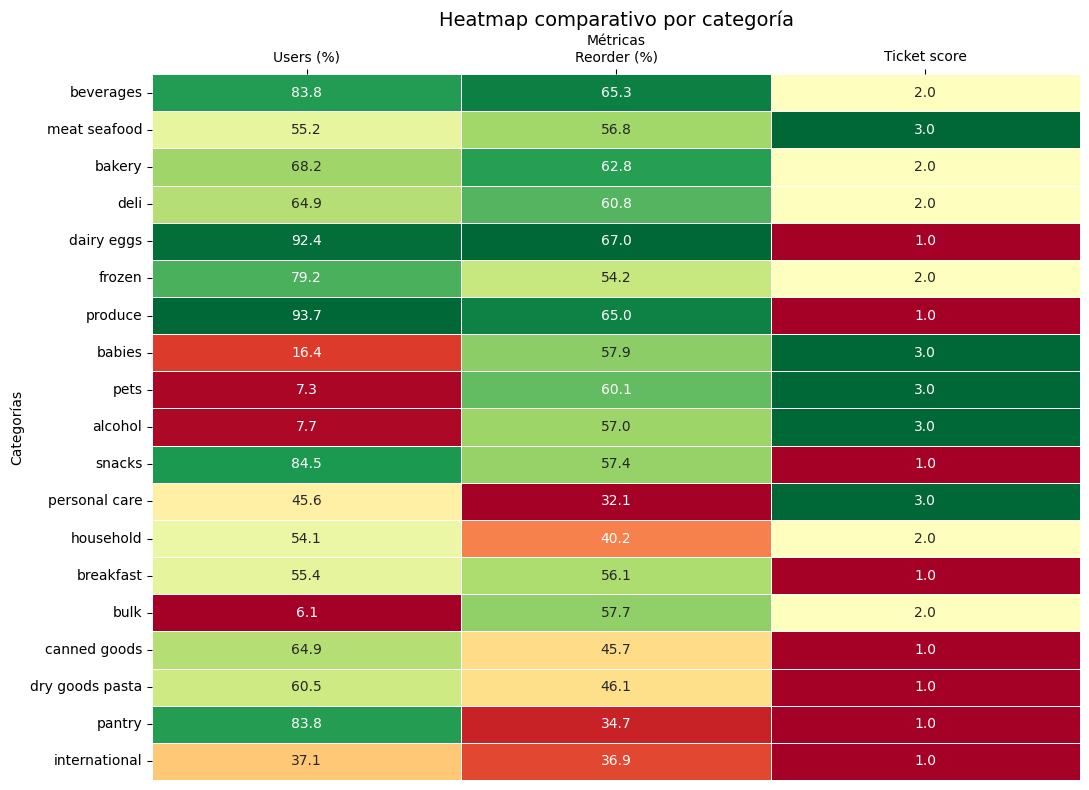

In [59]:
plt.figure(figsize=(11, 8))

sns.heatmap(
    heatmap_norm,
    cmap="RdYlGn",
    linewidths=0.6,
    linecolor="white",
    annot=annot_vals,
    fmt="",
    cbar_kws={"label": "Performance relativa"},
    cbar=False,
)

ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.title("Heatmap comparativo por categoría", fontsize=14)
plt.xlabel("Métricas")
plt.ylabel("Categorías")

plt.tight_layout()
plt.show()



##### **Conclusión**


Bajo el criterio nombrado:

Beverages se posiciona como la categoría más rentable debido a su alta penetración(presencia en la mayoria de pedidos), elevada tasa de recompra y ticket medio. Meat & Seafood aporta alta rentabilidad por valor unitario, aunque con menor escala.

Pese a su bajo ticket, Produce y Dairy Eggs, resultan altamente rentables debido a su rol central en la frecuencia de compra y el volumen total de pedidos.

En contraste, International presenta el menor rendimiento relativo, combinando baja penetración, bajo ticket y baja recompra.



##### **Oportunidad y propuesta de acción**

Hoy, menos del 8% de los usarios incluyen en sus pedidos las categorías de babies, alcohol, pets y bulks. Siendo estas, categorías con alto ticket promedio y alto reorder, se podría incentivar la inclusión de las mismas en las ordenes habituales. Impactando así, el ticket medio por pedido, y de esta forma aumentando la rentabilidad de Instacart. Esto se podría realizar a través de descuentos y promociones intercategoricas.

En el caso de Personal Care, el cual presenta un bajo reorder y solo lo consume el 40% de los usarios, podría ser útil analizar porque no se repiten tanto los pedidos. Una posible causa podría ser que los locales registrados en la plataforma tienen malos productos o servicios. Si este fuera el caso, se podría ampliar la oferta de proovedores, para lograr un mayor reorder. A su vez, promocionar más la categoría para aumentar el porcentaje de usuarios que la consumen e impactar en el ticket promedio de las ordenes.

## Resolucion - Probabilidad de recompra los proximos 30 dias

##### Modelos: Clasificación binaria

Base bodel: Logistic Regression

Otro Modelo:  LigthGBM (Gradient boosting)

In [60]:
data

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,department,reordered,days_since_prior_order
0,202279,2,3,5,09,33120,dairy eggs,1,8.00
1,202279,2,3,5,09,28985,produce,1,8.00
2,202279,2,3,5,09,9327,pantry,0,8.00
3,202279,2,3,5,09,45918,pantry,1,8.00
4,202279,2,3,5,09,30035,pantry,0,8.00
...,...,...,...,...,...,...,...,...,...
32434484,7370,3421068,2,4,16,6069,snacks,0,15.00
32434485,7370,3421068,2,4,16,48296,snacks,0,15.00
32434486,7370,3421068,2,4,16,19382,snacks,0,15.00
32434487,7370,3421068,2,4,16,9175,beverages,0,15.00


##### Ordenamos el dataset

1. Unimos orders con orders_products_train y con Order_products_prior. Para que quede completo el dataset, con la info que vamos a usar del historial de pedidos por user_id: 

* `order_id`: Identificador único del pedido.
* `user_id`: Identificador único del cliente.
* `order_number`: El número de pedido de ese cliente (1er pedido, 2do pedido, etc.).
* `order_dow`: Día de la semana en que se realizó el pedido (0-6).
* `order_hour_of_day`: Hora del día en que se realizó el pedido (0-23).
* `days_since_prior_order`: Días transcurridos desde el pedido anterior de este cliente (vacío si es el primer pedido).
* `product_id`: Identificador del producto.
* `add_to_cart_order`: El orden secuencial en que se añadió el producto al carrito.
* `reordered`: 1 si el cliente había comprado este producto antes, 0 si no.


2. eliminamos los orders que tienen eval_set = test ya que no tienen la data completo. 
3. Optimizamos los formatos para performance.

In [61]:
with duckdb.connect(DB_PATH) as con:
    query = con.execute(""" SELECT *            
    FROM orders
    """)
    order = query.fetchdf()
    query = con.execute(""" SELECT *            
    FROM order_products__prior
    """)
    order_products__prior = query.fetchdf()

    query = con.execute(""" SELECT *            
    FROM order_products__train
    """)
    order_products__train = query.fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [62]:
all_products = pd.concat([order_products__prior, order_products__train], axis=0, ignore_index=True)



data2= order.merge(all_products, on="order_id", how="left")

In [63]:
data2.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day          object
days_since_prior_order    float64
product_id                float64
add_to_cart_order         float64
reordered                 float64
dtype: object

In [64]:
data2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,08,NaN,196.00,1.00,0.00
1,2539329,1,prior,1,2,08,NaN,"14,084.00",2.00,0.00
2,2539329,1,prior,1,2,08,NaN,"12,427.00",3.00,0.00
3,2539329,1,prior,1,2,08,NaN,"26,088.00",4.00,0.00
4,2539329,1,prior,1,2,08,NaN,"26,405.00",5.00,0.00
...,...,...,...,...,...,...,...,...,...,...
33894101,272231,206209,train,14,6,14,30.00,"40,603.00",4.00,0.00
33894102,272231,206209,train,14,6,14,30.00,"15,655.00",5.00,0.00
33894103,272231,206209,train,14,6,14,30.00,"42,606.00",6.00,0.00
33894104,272231,206209,train,14,6,14,30.00,"37,966.00",7.00,0.00


In [65]:
# Excluir filas donde eval_set == 'test'
data2 = data2[data2["eval_set"] != "test"].copy()

##### Agregamos features a nivel order


In [66]:
data3 = (
    data2.groupby(["order_id", "user_id", "eval_set", "order_number", "order_dow", "order_hour_of_day", "days_since_prior_order"],
               as_index=False)
      .agg(
          items_in_order=("product_id", "size"),
          unique_products_in_order=("product_id", "nunique"),
          reordered_items=("reordered", "sum"),
          reorder_ratio_order=("reordered", "mean"),          # mean de 0/1 = ratio
      )
)


data3

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order
0,1,112108,train,4,4,10,9.00,8,8,4.00,0.50
1,2,202279,prior,3,5,09,8.00,9,9,6.00,0.67
2,3,205970,prior,16,5,17,12.00,8,8,8.00,1.00
3,4,178520,prior,36,1,09,7.00,13,13,12.00,0.92
4,5,156122,prior,42,6,16,9.00,26,26,21.00,0.81
...,...,...,...,...,...,...,...,...,...,...,...
3139869,3421078,70170,prior,10,5,11,7.00,9,9,7.00,0.78
3139870,3421079,108687,prior,6,1,13,0.00,1,1,0.00,0.00
3139871,3421080,52726,prior,2,1,11,2.00,9,9,4.00,0.44
3139872,3421082,175185,prior,23,2,18,4.00,7,7,4.00,0.57


In [67]:
data3.drop(columns=["eval_set"], inplace=True)

In [68]:
data3

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order
0,1,112108,4,4,10,9.00,8,8,4.00,0.50
1,2,202279,3,5,09,8.00,9,9,6.00,0.67
2,3,205970,16,5,17,12.00,8,8,8.00,1.00
3,4,178520,36,1,09,7.00,13,13,12.00,0.92
4,5,156122,42,6,16,9.00,26,26,21.00,0.81
...,...,...,...,...,...,...,...,...,...,...
3139869,3421078,70170,10,5,11,7.00,9,9,7.00,0.78
3139870,3421079,108687,6,1,13,0.00,1,1,0.00,0.00
3139871,3421080,52726,2,1,11,2.00,9,9,4.00,0.44
3139872,3421082,175185,23,2,18,4.00,7,7,4.00,0.57


##### Calculamos features históricos

In [69]:
tqdm.pandas(desc="Calculando métricas históricas")

# 0) ORDEN (imprescindible)
data4 = data3.sort_values(["user_id", "order_number"]).copy()

# Fin de semana
data4["is_weekend"] = data4["order_dow"].isin([0, 1]).astype("uint8")

# Suma acumulada de días desde la primer compra
data4["timeline_days"] = (
    data4.groupby("user_id")["days_since_prior_order"]
    .transform(lambda s: s.fillna(0).cumsum())
)

# variable: Agrupamiento de pedidos por User ID
group = data4.groupby("user_id")

# Calculo progresivo de la media por pedidos por usuario
data4["avg_days_between_orders"] = (
    group["days_since_prior_order"]
    .progress_transform(lambda x: x.fillna(0).expanding().mean())
)


# Esto me crea una nueva columna  que me guarda el reorder rate por usarios para cada pedido.
cum_reorders = group["reordered_items"].cumsum()
cum_items = group["items_in_order"].cumsum()
data4["reorder_rate_user"] = (cum_reorders / cum_items).fillna(0)

# Esto me crea una nueva columna  que me guarda el rate de pedidos en fin de semana por usarios para cada pedido.
data4["weekend_ratio"] = (
    group["is_weekend"]
    .progress_transform(lambda x: x.expanding().mean())
)

data4["avg_items_per_order"] = (
    group["items_in_order"]
    .progress_transform(lambda x: x.expanding().mean())
)

# 4) Cuento cuantos pedidos ocurrieron antes del pedido actual adentro de los 30 días. 
def orders_last_30d(t):
    t = t.to_numpy()
    left = np.searchsorted(t, t - 30, side="left")
    idx = np.arange(len(t))
    return idx - left + 1

data4["orders_last_30d"] = group["timeline_days"].transform(orders_last_30d).astype("int16")

# 5) Optimización memoria
del cum_reorders, cum_items
gc.collect()

cols_to_fix = ["avg_days_between_orders", "reorder_rate_user", "weekend_ratio", "avg_items_per_order"]
data4[cols_to_fix] = data4[cols_to_fix].astype("float32")

print("Procesamiento completo. Memoria optimizada.")




Calculando métricas históricas:   0%|          | 0/206209 [00:00<?, ?it/s]

Calculando métricas históricas:   0%|          | 0/206209 [00:00<?, ?it/s]

Calculando métricas históricas:   0%|          | 0/206209 [00:00<?, ?it/s]

Procesamiento completo. Memoria optimizada.


In [70]:
data4

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order,is_weekend,timeline_days,avg_days_between_orders,reorder_rate_user,weekend_ratio,avg_items_per_order,orders_last_30d
2201446,2398795,1,2,3,07,15.00,6,6,3.00,0.50,0,15.00,15.00,0.50,0.00,6.00,1
434838,473747,1,3,3,12,21.00,5,5,3.00,0.60,0,36.00,18.00,0.55,0.00,5.50,2
2069173,2254736,1,4,4,07,29.00,5,5,5.00,1.00,0,65.00,21.67,0.69,0.00,5.33,2
396044,431534,1,5,4,15,28.00,8,8,5.00,0.62,0,93.00,23.25,0.67,0.00,6.00,2
3090829,3367565,1,6,2,07,19.00,4,4,4.00,1.00,0,112.00,22.40,0.71,0.00,5.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080115,2266710,206209,10,5,18,29.00,9,9,3.00,0.33,0,155.00,17.22,0.47,0.22,8.78,2
1702095,1854736,206209,11,4,10,30.00,8,8,6.00,0.75,0,185.00,18.50,0.49,0.20,8.70,2
574758,626363,206209,12,1,12,18.00,20,20,14.00,0.70,1,203.00,18.45,0.53,0.27,9.73,2
2732952,2977660,206209,13,1,12,7.00,9,9,4.00,0.44,1,210.00,17.50,0.53,0.33,9.67,3


##### 29 días en vez de 30

In [ ]:
# Dado que la variable days_since_prior_order está truncada en 30, se considera recompra dentro de los 30 días únicamente cuando el pedido siguiente ocurre con un valor menor o igual a 29 días.

# Asegurar orden correcto
data4 = data4.sort_values(["user_id", "order_number"]).copy()
group = data4.groupby("user_id")

# Días hasta el próximo pedido
data4["days_to_next_order"] = group["days_since_prior_order"].shift(-1) # Trae el siguiente al actual de la columna nombrada.

# Target binario.
data4["reorder_30d"] = np.where(
    data4["days_to_next_order"].notna(),
    (data4["days_to_next_order"] <= 29),
    np.nan
)


In [72]:
data4.reorder_30d.isna().sum()  # NaN en el último pedido de cada usuario

206209

In [140]:
data4

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order,is_weekend,timeline_days,avg_days_between_orders,reorder_rate_user,weekend_ratio,avg_items_per_order,orders_last_30d,days_to_next_order,reorder_30d
0,2398795,1,2,3,07,15.00,6,6,3.00,0.50,0,15.00,15.00,0.50,0.00,6.00,1,21.00,1.00
1,473747,1,3,3,12,21.00,5,5,3.00,0.60,0,36.00,18.00,0.55,0.00,5.50,2,29.00,1.00
2,2254736,1,4,4,07,29.00,5,5,5.00,1.00,0,65.00,21.67,0.69,0.00,5.33,2,28.00,1.00
3,431534,1,5,4,15,28.00,8,8,5.00,0.62,0,93.00,23.25,0.67,0.00,6.00,2,19.00,1.00
4,3367565,1,6,2,07,19.00,4,4,4.00,1.00,0,112.00,22.40,0.71,0.00,5.60,2,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710946,2266710,206209,10,5,18,29.00,9,9,3.00,0.33,0,155.00,17.22,0.47,0.22,8.78,2,30.00,0.00
1710947,1854736,206209,11,4,10,30.00,8,8,6.00,0.75,0,185.00,18.50,0.49,0.20,8.70,2,18.00,1.00
1710948,626363,206209,12,1,12,18.00,20,20,14.00,0.70,1,203.00,18.45,0.53,0.27,9.73,2,7.00,1.00
1710949,2977660,206209,13,1,12,7.00,9,9,4.00,0.44,1,210.00,17.50,0.53,0.33,9.67,3,30.00,0.00


##### Dejamos solo los últimos 12 pedidos de cada usuario
Sino el 80% que va a train van a estar los que son nuevos. Y los que van a valid van los que tienen más de 90 pedidos

In [73]:
K = 12

data4 = (
 data4
    .sort_values(["user_id", "order_number"])
    .groupby("user_id", group_keys=False)
    .tail(K)
    .reset_index(drop=True)
)


In [74]:
data4.groupby("user_id")["order_number"].count()

user_id
1         10
2         12
3         11
4          4
5          4
          ..
206205     3
206206    12
206207    12
206208    12
206209    12
Name: order_number, Length: 206209, dtype: int64

<Axes: xlabel='reorder_30d', ylabel='count'>

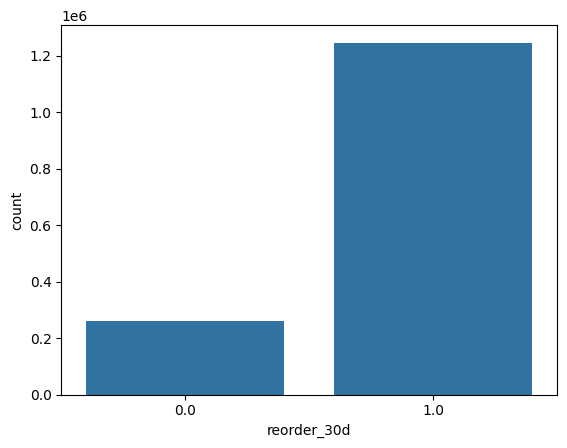

In [75]:
sns.countplot(data=data4, x="reorder_30d")

##### Separamos los últimos pedidos de los usuarios

In [76]:
data4["days_to_next_order"].isna().sum()

206209

##### Split train de scoring

In [141]:

train_valid_data = data4[data4["reorder_30d"].notna()].copy()
score_data = data4[data4["reorder_30d"].isna()].copy()
train_valid_data["reorder_30d"].mean()

0.8279266478904689

##### Split train de valid

In [ ]:
train_valid_data = train_valid_data.sort_values(["user_id", "order_number"])


# Ordeno los pedidos de forma decendente y me quedo para validación, el úlitimo
train_valid_data["rank_desc"] = (
    train_valid_data.groupby("user_id")["order_number"]
                    .rank(method="first", ascending=False)
)

train_df = train_valid_data[train_valid_data["rank_desc"] >= 2]
valid_df = train_valid_data[train_valid_data["rank_desc"] == 1]

In [145]:
train_valid_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order,is_weekend,timeline_days,avg_days_between_orders,reorder_rate_user,weekend_ratio,avg_items_per_order,orders_last_30d,days_to_next_order,reorder_30d,rank_desc
0,2398795,1,2,3,07,15.00,6,6,3.00,0.50,0,15.00,15.00,0.50,0.00,6.00,1,21.00,1.00,9.00
1,473747,1,3,3,12,21.00,5,5,3.00,0.60,0,36.00,18.00,0.55,0.00,5.50,2,29.00,1.00,8.00
2,2254736,1,4,4,07,29.00,5,5,5.00,1.00,0,65.00,21.67,0.69,0.00,5.33,2,28.00,1.00,7.00
3,431534,1,5,4,15,28.00,8,8,5.00,0.62,0,93.00,23.25,0.67,0.00,6.00,2,19.00,1.00,6.00
4,3367565,1,6,2,07,19.00,4,4,4.00,1.00,0,112.00,22.40,0.71,0.00,5.60,2,20.00,1.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710945,2558525,206209,9,4,15,22.00,3,3,3.00,1.00,0,126.00,15.75,0.49,0.25,8.75,2,29.00,1.00,5.00
1710946,2266710,206209,10,5,18,29.00,9,9,3.00,0.33,0,155.00,17.22,0.47,0.22,8.78,2,30.00,0.00,4.00
1710947,1854736,206209,11,4,10,30.00,8,8,6.00,0.75,0,185.00,18.50,0.49,0.20,8.70,2,18.00,1.00,3.00
1710948,626363,206209,12,1,12,18.00,20,20,14.00,0.70,1,203.00,18.45,0.53,0.27,9.73,2,7.00,1.00,2.00


In [146]:
train_df["user_id"].nunique(), valid_df["user_id"].nunique()


(197523, 206209)

In [80]:
FEATURES = [
    "avg_days_between_orders",
    "reorder_rate_user",
    "weekend_ratio",
    "avg_items_per_order",
    "items_in_order",
    "unique_products_in_order",
    "reordered_items",
    "reorder_ratio_order",
    "orders_last_30d"
]

X_train = train_df[FEATURES]
y_train = train_df["reorder_30d"].astype(int)

X_valid = valid_df[FEATURES]
y_valid = valid_df["reorder_30d"].astype(int)

X_score = score_data[FEATURES] 


In [147]:
X_score

,avg_days_between_orders,reorder_rate_user,weekend_ratio,avg_items_per_order,items_in_order,unique_products_in_order,reordered_items,reorder_ratio_order,orders_last_30d
9,19.00,0.78,0.30,6.50,11,11,10.00,0.91,2
21,16.29,0.49,0.43,15.21,31,31,12.00,0.39,2
32,12.09,0.71,0.64,7.09,6,6,6.00,1.00,3
36,13.75,0.07,0.00,3.50,3,3,0.00,0.00,3
40,11.50,0.51,0.75,8.75,9,9,4.00,0.44,3
...,...,...,...,...,...,...,...,...,...
1710902,16.67,0.41,0.33,11.33,19,19,6.00,0.32,3
1710914,3.77,0.48,0.39,4.26,3,3,3.00,1.00,3
1710926,14.33,0.66,0.40,13.27,13,13,13.00,1.00,4
1710938,7.44,0.72,0.29,13.85,17,17,14.00,0.82,4


##### Logistic Regressión

In [ ]:
# Pipeline con StandardScaler + LogisticRegression

logit = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        penalty="l2", # reguralización
        C=1.0,
        solver="lbfgs",
        max_iter=3000,
        n_jobs=-1,
        class_weight={0: 3, 1: 1}
    ))
])


##### Fit + predict_proba

In [83]:
logit.fit(X_train, y_train)

valid_probs = logit.predict_proba(X_valid)[:, 1]
score_data["score_reorder_30d"] = logit.predict_proba(X_score)[:, 1]


In [ ]:
## `logit` es Pipeline, uso el step "model"
model = logit.named_steps["model"] if hasattr(logit, "named_steps") else logit

coefs = pd.Series(
    model.coef_[0],
    index=FEATURES
).sort_values()

coefs


avg_days_between_orders    -0.49
reorder_ratio_order        -0.10
avg_items_per_order        -0.04
weekend_ratio              -0.01
items_in_order              0.04
unique_products_in_order    0.04
reordered_items             0.09
reorder_rate_user           0.21
orders_last_30d             0.97
dtype: float64

In [148]:
# Probabilidades
valid_probs = logit.predict_proba(X_valid)[:, 1]

# --- Métricas "ranking" ---
roc = roc_auc_score(y_valid, valid_probs)
pr_auc = average_precision_score(y_valid, valid_probs)   # PR-AUC (muy útil si hay desbalance)
brier = brier_score_loss(y_valid, valid_probs)           # calibración (menor es mejor)

print(f"ROC-AUC: {roc:.4f}")  # 0,5 es azar
print(f"PR-AUC : {pr_auc:.4f}")




ROC-AUC: 0.7414
PR-AUC : 0.8789


In [149]:
thr = 0.6  # probá 0.3 / 0.4 / 0.5 o definilo por capacidad
y_pred = (valid_probs >= thr).astype(int)

cm = confusion_matrix(y_valid, y_pred)



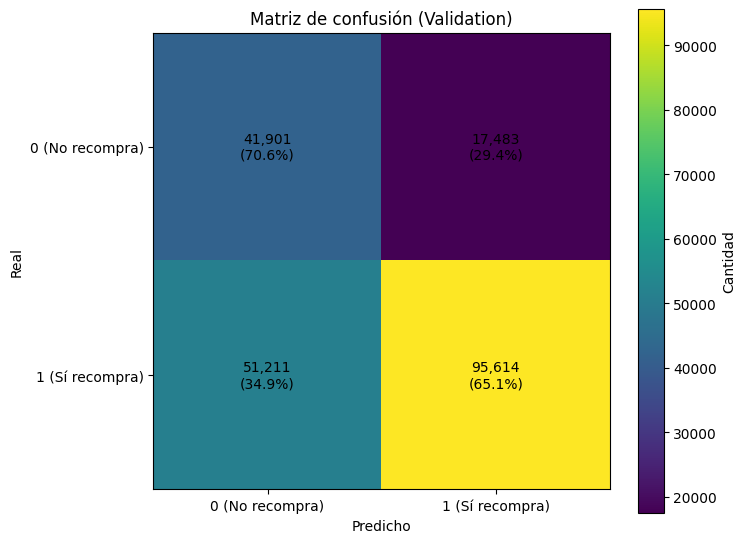

In [87]:
# Confusion matrix values provided by the user


labels = ["0 (No recompra)", "1 (Sí recompra)"]

fig, ax = plt.subplots(figsize=(7.5, 6))
im = ax.imshow(cm)

# Axis labels and ticks
ax.set_xticks([0, 1], labels=labels)
ax.set_yticks([0, 1], labels=labels)
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")
ax.set_title("Matriz de confusión (Validation)")

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Cantidad")

# Annotate each cell with count and percentage by row
row_sums = cm.sum(axis=1, keepdims=True)
pct = cm / row_sums

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i,
            f"{cm[i, j]:,}\n({pct[i, j]*100:.1f}%)",
            ha="center", va="center"
        )

# Improve layout
plt.tight_layout()
plt.show()


##### LightGBM

In [88]:
# Manejo de desbalance

base_spw = (y_train == 0).sum() / (y_train == 1).sum()
base_spw



0.18156836589198638

In [89]:
X_train = train_df[FEATURES]
y_train = train_df["reorder_30d"].astype(int)

X_valid = valid_df[FEATURES]
y_valid = valid_df["reorder_30d"].astype(int)

In [90]:

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)


In [91]:
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",

    "learning_rate": 0.05,
    "num_leaves": 31,
    "min_data_in_leaf": 100,

    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,

    "scale_pos_weight": 0.2, 
    "verbosity": -1,
    "seed": 42
}


##### Fit + predict_proba

In [92]:
model_lgb = lgb.train(
    params,
    lgb_train,
    num_boost_round=2000,
    valid_sets=[lgb_valid],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=100)
    ]
)




Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.747126
[200]	valid_0's auc: 0.748171
[300]	valid_0's auc: 0.748599
[400]	valid_0's auc: 0.748936
[500]	valid_0's auc: 0.749104
[600]	valid_0's auc: 0.749191
[700]	valid_0's auc: 0.749289
[800]	valid_0's auc: 0.749269
Early stopping, best iteration is:
[702]	valid_0's auc: 0.749292


In [93]:
valid_probs_lgb = model_lgb.predict(
    X_valid, num_iteration=model_lgb.best_iteration
)

In [94]:


THRESHOLD = 0.60

y_pred_lgb = (valid_probs_lgb >= THRESHOLD).astype(int)

cm_lgb = confusion_matrix(y_valid, y_pred_lgb)
cm_lgb


array([[51563,  7821],
       [76133, 70692]], dtype=int64)

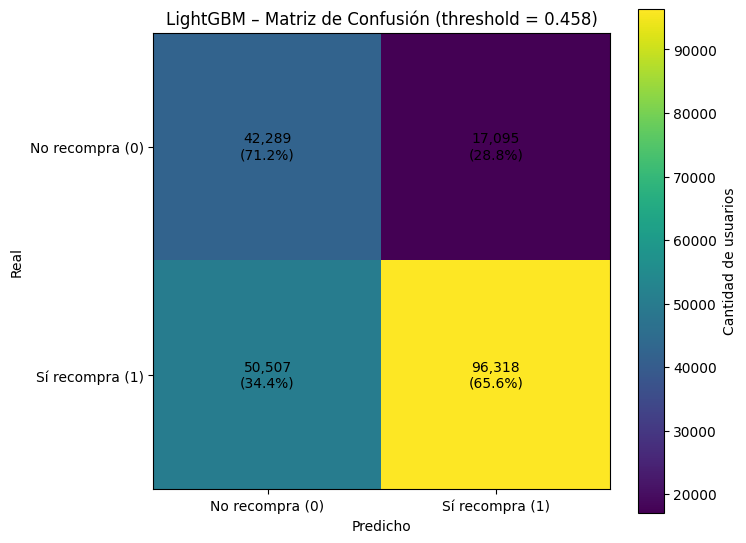

In [151]:
# Asumimos que ya existen en el entorno:
# y_valid
# valid_probs_lgb

THRESHOLD = 0.458
y_pred_lgb = (valid_probs_lgb >= THRESHOLD).astype(int)

cm = confusion_matrix(y_valid, y_pred_lgb)

labels = ["No recompra (0)", "Sí recompra (1)"]

fig, ax = plt.subplots(figsize=(7.5, 6))
im = ax.imshow(cm)

# Ejes
ax.set_xticks([0, 1], labels=labels)
ax.set_yticks([0, 1], labels=labels)
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")
ax.set_title(f"LightGBM – Matriz de Confusión (threshold = {THRESHOLD})")

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Cantidad de usuarios")

# Anotar valores y porcentajes por fila (real)
row_sums = cm.sum(axis=1, keepdims=True)
pct = cm / row_sums

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i,
            f"{cm[i, j]:,}\n({pct[i, j]*100:.1f}%)",
            ha="center", va="center"
        )

plt.tight_layout()
plt.show()


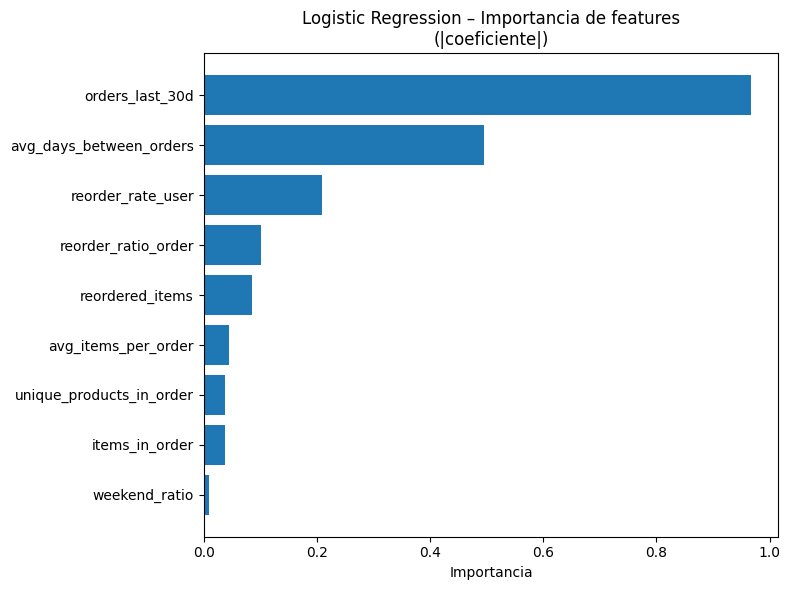

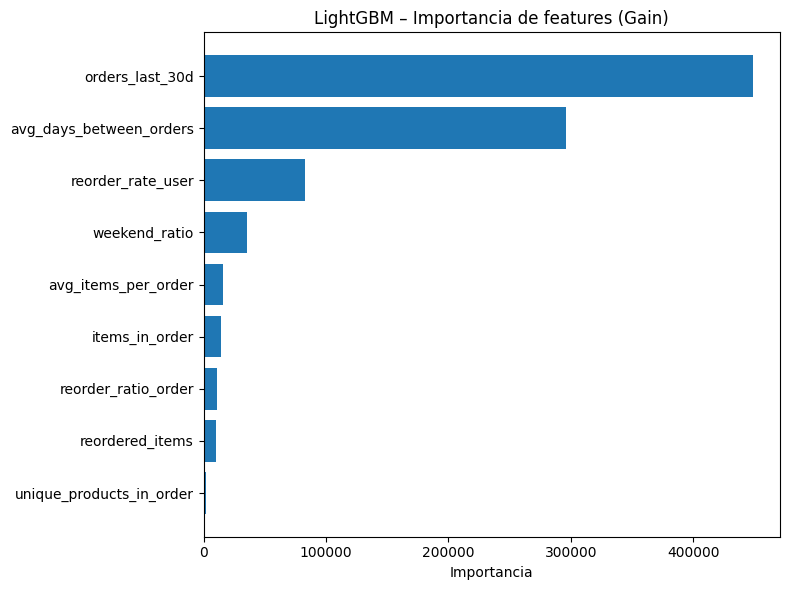

In [96]:

# --- Logistic Regression feature importance (coeficientes absolutos) ---
# Asume:
# logit -> pipeline entrenado
# FEATURES -> lista de features

logit_coefs = pd.Series(
    logit.named_steps["model"].coef_[0],
    index=FEATURES
)

logit_importance = logit_coefs.abs().sort_values()

plt.figure(figsize=(8, 6))
plt.barh(logit_importance.index, logit_importance.values)
plt.title("Logistic Regression – Importancia de features\n(|coeficiente|)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


# --- LightGBM feature importance ---
# Asume:
# model_lgb -> modelo LightGBM entrenado

lgb_importance = pd.Series(
    model_lgb.feature_importance(importance_type="gain"),
    index=FEATURES
).sort_values()

plt.figure(figsize=(8, 6))
plt.barh(lgb_importance.index, lgb_importance.values)
plt.title("LightGBM – Importancia de features (Gain)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


##### Elección del modelo. 
Dada la baja mejora que nos implica el uso del modelo más complejo (ligthGBM), optamos por el modelo de regresión logística por su interpretabilidad y facilidad de implementación.


##### Predicción de probabilidad de los usuarios

In [97]:
X_full = train_data[FEATURES]
y_full = train_data["reorder_30d"].astype(int)

logit.fit(X_full, y_full)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight={0: 3, 1: 1}, max_iter=3000,
                                    n_jobs=-1))])

In [98]:
X_score = score_data[FEATURES]

score_data = score_data.copy()
score_data["score_reorder_30d"] = logit.predict_proba(X_score)[:, 1]


##### Lista de usuarios y su Probabilidad

In [99]:
ProbxUsuario = score_data[["user_id", "score_reorder_30d"]].copy()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1788\3097922989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=score_data, x='rango', palette='magma')


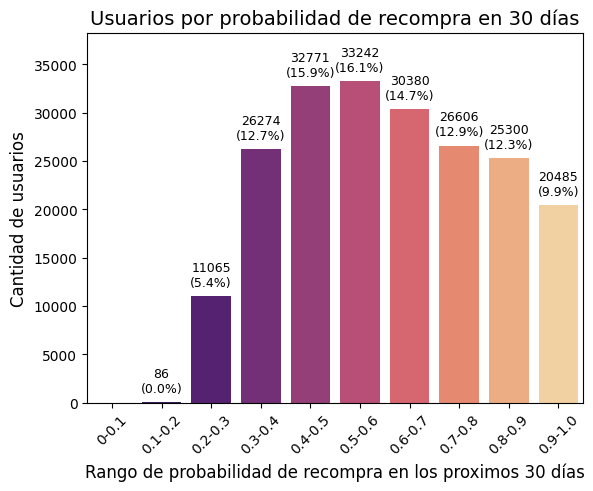

In [100]:
# 1. Definir bins y etiquetas
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
score_data['rango'] = pd.cut(score_data['score_reorder_30d'], bins=bins, labels=labels, include_lowest=True)

# 2. Calcular frecuencias y porcentajes
total = len(score_data)
ax = sns.countplot(data=score_data, x='rango', palette='magma')
# 3. Añadir porcentajes y conteos sobre las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{int(height)}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 15),
                textcoords='offset points')

# 4. Estética del gráfico
plt.title('Usuarios por probabilidad de recompra en 30 días', fontsize=14)
plt.xlabel('Rango de probabilidad de recompra en los proximos 30 días', fontsize=12)
plt.ylabel('Cantidad de usuarios', fontsize=12)
plt.ylim(0, score_data['rango'].value_counts().max() * 1.15) # Espacio para etiquetas
plt.xticks(rotation=45)
plt.show()



##### Definición de Threshold para oportunidad y propuesta

In [101]:
THRESHOLD = 0.60

score_data["flag_riesgo_de_no compra"] = (
    score_data["score_reorder_30d"] < THRESHOLD
).astype(int)


In [102]:
def impact_table_by_threshold(y_true, y_score, thresholds):
    rows = []
    n_total = len(y_true)

    for t in thresholds:
        y_pred = (y_score >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        No_compran_en_30d = tn + fn  # predicho = 0
        recall_no = tn / (tn + fp)
        TN_sobre_total_users = tn / n_total
        FN = fn
        TFN = fn / (fn + tp)

        rows.append({
            "corte": t,
            "Predichos correctamente que no recompran ": tn,
            "% de Users que no recompra correctamente predichos": recall_no,
            "Predichos incorrectamente": FN,
            "% de Users que recompra y fueron incorrectamente predichos": TFN,
        })

    return pd.DataFrame(rows)


In [103]:
corte = [0.4, 0.5, 0.6, 0.7, 0.8]
impact_df = impact_table_by_threshold(y_valid, valid_probs, corte)

impact_df


,corte,Predichos correctamente que no recompran,% de Users que no recompra correctamente predichos,Predichos incorrectamente,% de Users que recompra y fueron incorrectamente predichos
0,0.40,16616,0.28,13670,0.09
1,0.50,29891,0.50,30000,0.20
2,0.60,41901,0.71,51211,0.35
3,0.70,50804,0.86,74984,0.51
4,0.80,56063,0.94,99135,0.68


###### Conclusión


Con un umbral (threshold) de 0.60 logramos reconocer al 71% de los usuarios que no iban a recomprar dentro de los próximos 30 días (esto es el Recall de la clase 'No Compra'. Pero estaríamos clasificando como que no recompraba a un 35% adicional de usuarios, que en realidad sí iban a comprar.
La decisión final del umbral a elegir depende del costo de la promoción a implementar versus el valor de retener a un cliente.”
 


##### Oportunidad y Propuesta: 
Trabajar sobre la retención o el aumento de la frecuencia de compra, promocionando para incentivar el habito de productos que conlleven ordenes de frecuencia más corta. Y a la vez minimizar los costos y maximizar la ganancia optimizando la siguiente ecuación:


Ganancia = ((1)User que verdaderamente no compraban en 30d* valor de retención) 
– (costo_promo* (1)User que verdaderamente no compraban en 30d + (2)Users que compraban en 30 y fueron mal predichos)

Optimizar modelo usando la siguente ecuación: Maximizar Ganancia: Reduciendo (2) y aumentando (1)


## Resolucion - Sentimiento del Cliente

Utilizamos técnicas de procesamiento de lenguaje natural (NLP) para analizar los comentarios de los clientes y extraer insights sobre la percepción del producto.


1. Identificación de Oportunidades: Basado en tus análisis, identifica al menos tres oportunidades específicas para mejorar el negocio. Estas podrían ser mejoras en la experiencia del usuario, optimización de inventario, o estrategias de marketing dirigidas.
1. Propuestas de Acción: Para cada oportunidad identificada, propone una acción concreta que la empresa podría tomar. Justifica tus propuestas con datos y análisis.

##### Dataset: [Amazon Product Data]
(https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews)

In [104]:
Musical_instruments_reviews = pd.read_csv("Musical_instruments_reviews.csv")

# Nos quedamos solo con lo necesario
df = Musical_instruments_reviews[["reviewText", "overall", "asin"]].dropna()

df["overall"] = df["overall"].astype(int)

df_raw = df.copy()

In [105]:
df_raw

,reviewText,overall,asin
0,"Not much to write about here, but it does exac...",5,1384719342
1,The product does exactly as it should and is q...,5,1384719342
2,The primary job of this device is to block the...,5,1384719342
3,Nice windscreen protects my MXL mic and preven...,5,1384719342
4,This pop filter is great. It looks and perform...,5,1384719342
...,...,...,...
10256,"Great, just as expected. Thank to all.",5,B00JBIVXGC
10257,I've been thinking about trying the Nanoweb st...,5,B00JBIVXGC
10258,I have tried coated strings in the past ( incl...,4,B00JBIVXGC
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",4,B00JBIVXGC


##### Analisis exploratorio

In [106]:
df.sort_values("overall")

,reviewText,overall,asin
8970,The HDE xlr to usb is ubs. I have the same pro...,1,B0050CEEIW
6873,"I thought it was my jack for a while, then I n...",1,B001PGXKC8
3531,These picks do cut pick noise but with an acou...,1,B0002Z2D0I
9082,It was almost obvious this product would come ...,1,B005CX4GLE
4943,"Bought this because of all the great reviews, ...",1,B000KIRT74
...,...,...,...
4015,It's a guitar strap. It holds up the guitar. U...,5,B0009G1E0K
4014,I recently purchased two Protec guitar straps ...,5,B0009G1E0K
4013,"Very good strap, but the pick pocket does not ...",5,B0009G1E0K
4011,This strap is a great strap. It is comfortable...,5,B0009G1E0K


In [107]:
df.shape
df["asin"].nunique()


900

In [108]:

df["review_len"] = df["reviewText"].str.len()

df.groupby("overall")["review_len"].mean()

overall
1   539.08
2   614.03
3   579.21
4   540.59
5   453.32
Name: review_len, dtype: float64

In [109]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### Preprocesamiento de texto

In [110]:
import re

STOPWORDS_EN = {
    "the","a","an","and","or","but","if","then","else","when","at","by","for","in","of","on","to","from",
    "is","are","was","were","be","been","being","it","this","that","these","those","i","you","he","she",
    "they","we","me","him","her","them","us","my","your","his","their","our","as","with","about","into",
    "over","after","before","between","out","up","down","so","no","not","too","very","can","could",
    "should","would","will","just","than","also"
}

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"[^a-z\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [t for t in text.split() if t not in STOPWORDS_EN and len(t) > 1]
    return " ".join(tokens)

df["clean_review"] = df["reviewText"].astype(str).map(clean_text)


In [111]:

%pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


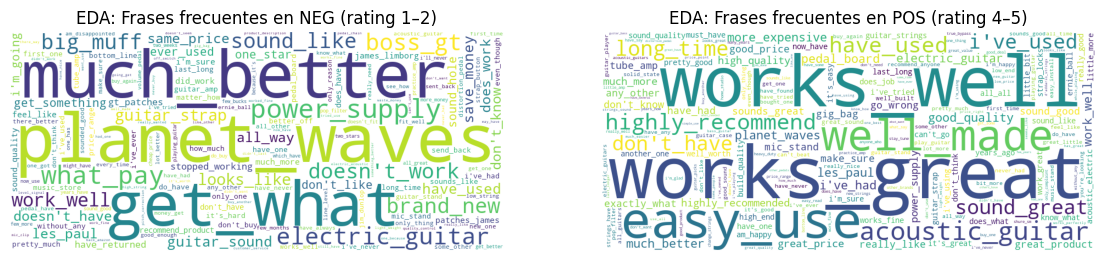

In [112]:


def extract_ngrams(texts, n=2):
    out = []
    for txt in texts:
        toks = txt.split()
        out += ["_".join(toks[i:i+n]) for i in range(len(toks)-n+1)]
    return out

# Limpieza
neg_clean = df.loc[df["overall"] <= 2, "reviewText"].dropna().astype(str).map(clean_text)
pos_clean = df.loc[df["overall"] >= 4, "reviewText"].dropna().astype(str).map(clean_text)

# Bigrams
neg_phrases = extract_ngrams(neg_clean, n=2)
pos_phrases = extract_ngrams(pos_clean, n=2)

# Filtrar frases muy raras (ruido)
neg_counts = Counter(neg_phrases)
pos_counts = Counter(pos_phrases)

neg_keep = {k:v for k,v in neg_counts.items() if v >= 5}
pos_keep = {k:v for k,v in pos_counts.items() if v >= 5}

wc_neg_ph = WordCloud(width=900, height=400, background_color="white", collocations=False)\
    .generate_from_frequencies(neg_keep)

wc_pos_ph = WordCloud(width=900, height=400, background_color="white", collocations=False)\
    .generate_from_frequencies(pos_keep)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1); plt.imshow(wc_neg_ph.to_image()); plt.axis("off"); plt.title("EDA: Frases frecuentes en NEG (rating 1–2)")
plt.subplot(1,2,2); plt.imshow(wc_pos_ph.to_image()); plt.axis("off"); plt.title("EDA: Frases frecuentes en POS (rating 4–5)")
plt.show()




In [113]:
df_eda = df[["overall"]].dropna().copy()

def rating_to_sentiment(r):
    if r <= 2:
        return "Negativo"
    elif r == 3:
        return "Neutral"
    else:
        return "Positivo"

df_eda["sentiment"] = df_eda["overall"].map(rating_to_sentiment)

sentiment_counts = df_eda["sentiment"].value_counts()
sentiment_pct = df_eda["sentiment"].value_counts(normalize=True) * 100

sentiment_summary = (
    pd.concat([sentiment_counts, sentiment_pct], axis=1)
      .rename(columns={0: "Cantidad", 1: "Porcentaje"})
)

sentiment_summary



,count,proportion
sentiment,,
Positivo,9015,87.92
Neutral,772,7.53
Negativo,467,4.55


In [114]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### Variable objetivo: sentimiento

In [115]:
def label_sentiment(r):
    if r <= 2:
        return "neg"
    elif r == 3:
        return "neu"
    else:
        return "pos"

df["sentiment"] = df["overall"].map(label_sentiment)


In [116]:
from sklearn.model_selection import train_test_split

X_text = df["clean_review"]
y = df["sentiment"]

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##### TF-IDF

In [117]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=2
)

X_train = tfidf.fit_transform(X_train_text)
X_test  = tfidf.transform(X_test_text)



In [ ]:
X_train

(8203, 10000)

##### Models:

A. logisticRegression (Baseline)

b. LinearSVC()

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


class_weights = {
    "neg": 15,
    "neu": 2,
    "pos": 1
}


logit_bal = LogisticRegression(
    max_iter=3000,
    class_weight= class_weights
)

svm_bal = LinearSVC(
    class_weight= class_weights
)

logit_bal.fit(X_train, y_train)
svm_bal.fit(X_train, y_train)



C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(class_weight={'neg': 15, 'neu': 2, 'pos': 1})

##### Evaluación:


===== Logistic Regression (TF-IDF) =====


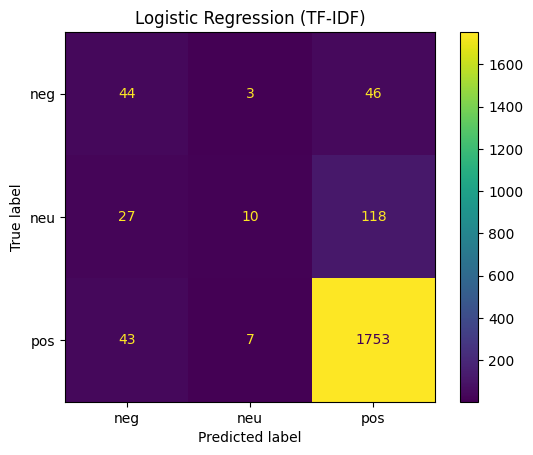


===== Linear SVM (TF-IDF) =====


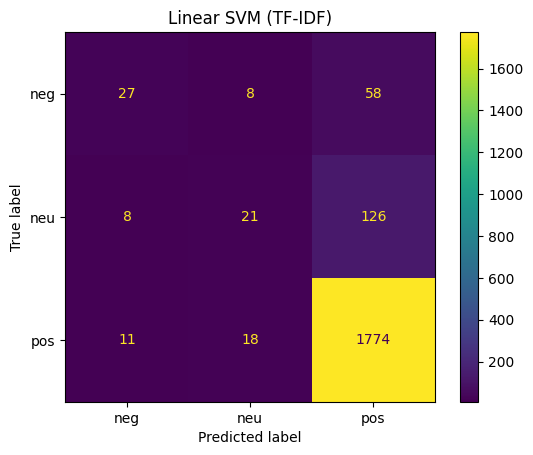

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate(name, model):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")

    cm = confusion_matrix(y_test, y_pred, labels=["neg","neu","pos"])
    ConfusionMatrixDisplay(cm, display_labels=["neg","neu","pos"]).plot()
    plt.title(name)
    plt.show()

evaluate("Logistic Regression (TF-IDF)", logit_bal)
evaluate("Linear SVM (TF-IDF)", svm_bal)

##### Elección del modelo

Logistic Regression (TF-IDF).  Por mejor interpretabilidad y mayor simpleza, en poco tiempo mejores resultados.

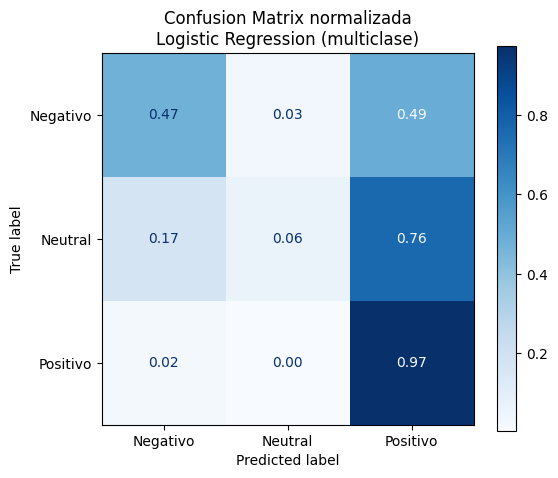

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predicción del modelo multiclase original
y_true = y_test
y_pred = logit_bal.predict(X_test)

labels = ["neg", "neu", "pos"]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Normalización por fila (recall por clase)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_norm,
    display_labels=["Negativo", "Neutral", "Positivo"]
)

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(
    cmap="Blues",
    values_format=".2f",
    ax=ax
)

ax.set_title("Confusion Matrix normalizada\nLogistic Regression (multiclase)")
plt.show()


##### Mejora al modelo

Se mejoró el modelo priorizando la detección de reviews negativas, aceptando una leve pérdida de recall en positivos para ganar estabilidad global. Para ello, el problema se reformuló en dos etapas: primero se clasifican comentarios negativos vs no negativos, y luego se separan los no negativos en neutrales y positivos.


In [121]:
df2 = df_raw[["asin","reviewText","overall"]].dropna().copy()
df2["overall"] = df2["overall"].astype(int)

# limpieza
df2["clean_review"] = df2["reviewText"].astype(str).map(clean_text)

def label_sentiment(r):
    if r <= 2: return "neg"
    if r == 3: return "neu"
    return "pos"

df2["sentiment"] = df2["overall"].map(label_sentiment)

# Etapa A: neg vs no_neg
df2["y_stageA"] = (df2["sentiment"] == "neg").astype(int)  # 1=neg, 0=no_neg

# Etapa B: solo no_neg (neu vs pos)
df2["y_stageB"] = df2["sentiment"].map({"neu": 0, "pos": 1})  # 0=neu, 1=pos

In [122]:
## Dividir en train/test manteniendo proporciones de clases

train_idx, test_idx = train_test_split(
    df2.index,
    test_size=0.2,
    random_state=42,
    stratify=df2["sentiment"]   # mantiene proporciones neg/neu/pos
)

df_train2 = df2.loc[train_idx].copy()
df_test2  = df2.loc[test_idx].copy()

In [123]:
## Vectorización

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train = tfidf.fit_transform(df_train2["clean_review"])
X_test  = tfidf.transform(df_test2["clean_review"])

In [124]:
from sklearn.linear_model import LogisticRegression

# pesos: penalizo mucho errar NEG
logit_A = LogisticRegression(
    max_iter=2000,
    class_weight={1: 26, 0: 1} ### Probano varios elegí este. 
)

logit_A.fit(X_train, df_train2["y_stageA"])

LogisticRegression(class_weight={0: 1, 1: 26}, max_iter=2000)

In [125]:
mask_no_neg = df_train2["y_stageA"] == 0  # en train: no_neg = 0

X_train_B = X_train[mask_no_neg]
y_train_B = df_train2.loc[mask_no_neg, "y_stageB"].values  # 0=neu, 1=pos

logit_B = LogisticRegression(
    max_iter=2000,
    class_weight= {1: 1, 0: 30}
)

logit_B.fit(X_train_B, y_train_B)


LogisticRegression(class_weight={0: 30, 1: 1}, max_iter=2000)

In [126]:


# Stage A: prob de ser NEG
p_neg = logit_A.predict_proba(X_test)[:, 1]

TH_NEG = 0.35  # general un buen recall de negativos y una tasa aceptable de falsos positivos. 

pred_final = np.empty(len(df_test2), dtype=object)

# Si supera threshold → NEG
is_neg = p_neg >= TH_NEG
pred_final[is_neg] = "neg"

# Si NO es NEG → Stage B (neu vs pos)
X_test_nonneg = X_test[~is_neg]
pred_B = logit_B.predict(X_test_nonneg)  # 0=neu, 1=pos
pred_final[~is_neg] = np.where(pred_B == 0, "neu", "pos")

df_test2["pred_2stage"] = pred_final


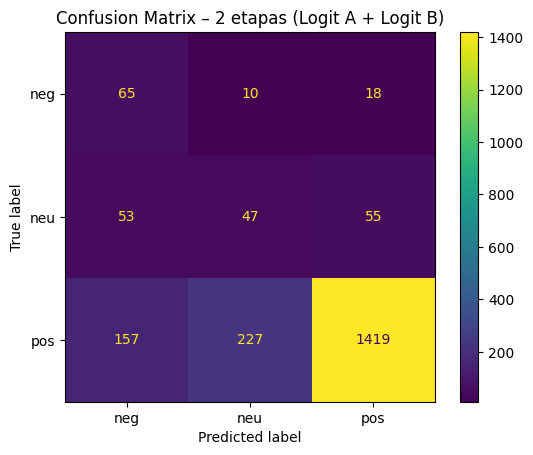

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(df_test2["sentiment"], df_test2["pred_2stage"], labels=["neg","neu","pos"])
ConfusionMatrixDisplay(cm, display_labels=["neg","neu","pos"]).plot()
plt.title("Confusion Matrix – 2 etapas (Logit A + Logit B)")
plt.show()


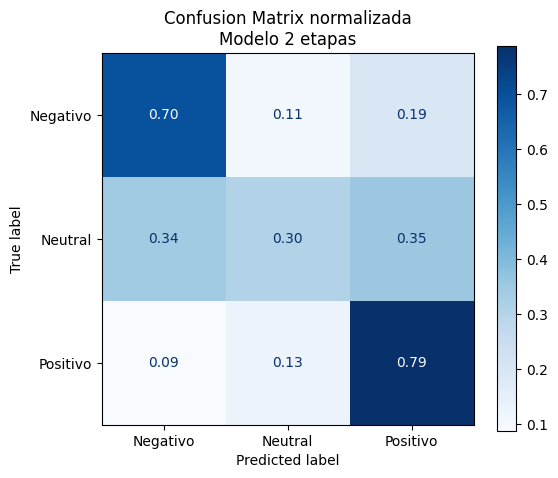

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_true y y_pred del modelo 2 etapas
y_true = df_test2["sentiment"].values
y_pred = df_test2["pred_2stage"].values

# Confusion matrix
labels = ["neg", "neu", "pos"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Normalización por fila (recall por clase)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_norm,
    display_labels=["Negativo", "Neutral", "Positivo"]
)

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(
    cmap="Blues",
    values_format=".2f",
    ax=ax
)

ax.set_title("Confusion Matrix normalizada\nModelo 2 etapas")
plt.show()


In [129]:
from sklearn.metrics import f1_score, recall_score

def eval_threshold(th):
    p_neg = logit_A.predict_proba(X_test)[:, 1]
    is_neg = p_neg >= th

    pred = np.empty(len(df_test2), dtype=object)
    pred[is_neg] = "neg"

    pred_B = logit_B.predict(X_test[~is_neg])
    pred[~is_neg] = np.where(pred_B == 0, "neu", "pos")

    y_true = df_test2["sentiment"].values
    return {
        "th": th,
        "macro_f1": f1_score(y_true, pred, average="macro"),
        "recall_neg": recall_score(y_true, pred, labels=["neg"], average=None)[0]
    }

for th in [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]:
    print(eval_threshold(th))


{'th': 0.2, 'macro_f1': 0.38974509936520957, 'recall_neg': 0.9032258064516129}
{'th': 0.25, 'macro_f1': 0.41788502551735623, 'recall_neg': 0.8387096774193549}
{'th': 0.3, 'macro_f1': 0.45169385758528263, 'recall_neg': 0.7204301075268817}
{'th': 0.35, 'macro_f1': 0.4762296279953946, 'recall_neg': 0.6989247311827957}
{'th': 0.4, 'macro_f1': 0.5034915585437792, 'recall_neg': 0.6666666666666666}
{'th': 0.45, 'macro_f1': 0.5118023596370155, 'recall_neg': 0.6021505376344086}


##### Predicción de sentimiento

In [130]:
X_all = tfidf.transform(df2["clean_review"])
p_neg_all = logit_A.predict_proba(X_all)[:, 1]

is_neg_all = p_neg_all >= TH_NEG

pred_all = np.empty(len(df2), dtype=object)
pred_all[is_neg_all] = "neg"
pred_B_all = logit_B.predict(X_all[~is_neg_all])
pred_all[~is_neg_all] = np.where(pred_B_all == 0, "neu", "pos")

df2["sentiment_pred_2stage"] = pred_all


#### Agregación por producto

In [131]:
score_map = {"neg": -1, "neu": 0, "pos": 1}
df2["sentiment_score"] = df2["sentiment_pred_2stage"].map(score_map)


product_summary = (
    df2.groupby("asin")
      .agg(
          n_reviews=("asin", "size"),
          avg_rating=("overall", "mean"),
          pct_neg=("sentiment_pred_2stage", lambda s: (s=="neg").mean()),
          pct_neu=("sentiment_pred_2stage", lambda s: (s=="neu").mean()),
          pct_pos=("sentiment_pred_2stage", lambda s: (s=="pos").mean()),
          sentiment_score=("sentiment_score", "mean")
      )
      .reset_index()
)


In [132]:
MIN_REVIEWS = 30

problematic_products = (
    product_summary
    .sort_values(
        ["pct_neg", "sentiment_score"],
        ascending=[False, True]
    )
)

problematic_products.sort_values("sentiment_score", ascending=True)

,asin,n_reviews,avg_rating,pct_neg,pct_neu,pct_pos,sentiment_score
695,B003KQY8DQ,6,3.00,0.67,0.33,0.00,-0.67
670,B003AM913C,5,3.20,0.80,0.00,0.20,-0.60
600,B0025V1REU,7,2.71,0.71,0.00,0.29,-0.43
764,B004Z8VQ2O,7,3.43,0.71,0.00,0.29,-0.43
491,B000ZJTPLG,7,3.14,0.57,0.29,0.14,-0.43
...,...,...,...,...,...,...,...
262,B0006ZXFZQ,5,5.00,0.00,0.00,1.00,1.00
242,B0002Y6BJI,9,4.67,0.00,0.00,1.00,1.00
239,B0002PBS6I,12,4.92,0.00,0.00,1.00,1.00
237,B0002PBS5Y,6,4.33,0.00,0.00,1.00,1.00


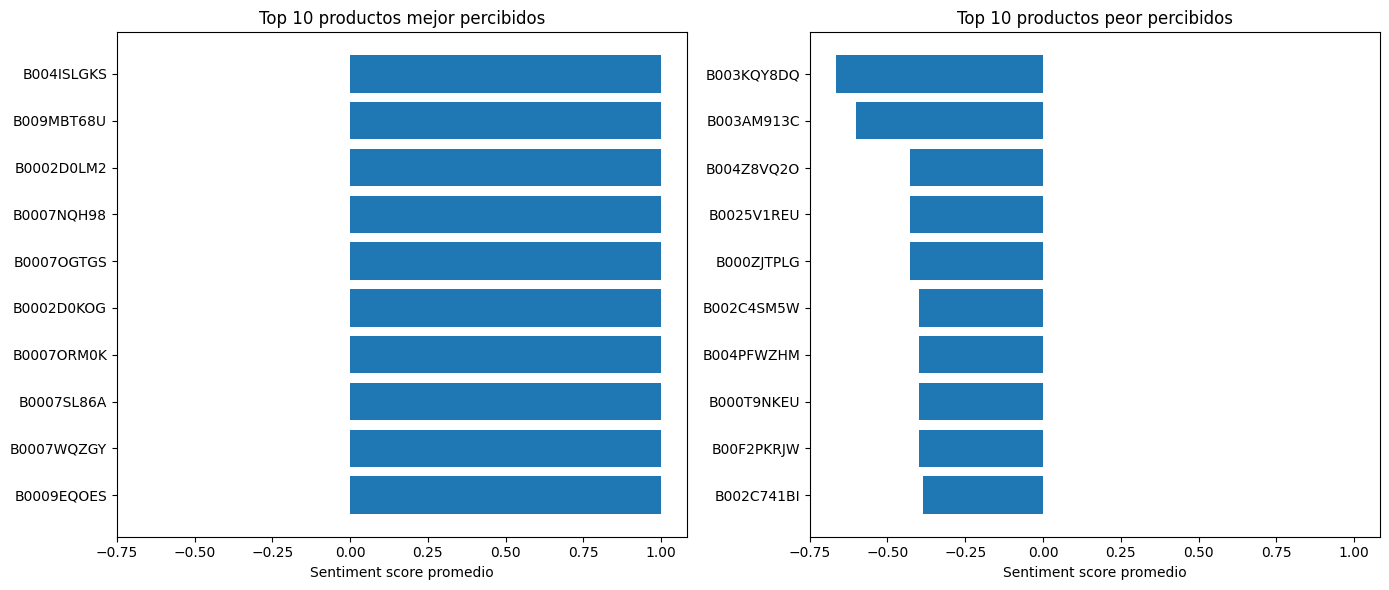

In [133]:

rank_df = product_summary.copy()

top_good = rank_df.sort_values("sentiment_score", ascending=False).head(10)
top_bad  = rank_df.sort_values("sentiment_score", ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Mejores
axes[0].barh(top_good["asin"], top_good["sentiment_score"])
axes[0].set_title("Top 10 productos mejor percibidos")
axes[0].invert_yaxis()
axes[0].set_xlabel("Sentiment score promedio")

# Peores
axes[1].barh(top_bad["asin"], top_bad["sentiment_score"])
axes[1].set_title("Top 10 productos peor percibidos")
axes[1].invert_yaxis()
axes[1].set_xlabel("Sentiment score promedio")

plt.tight_layout()
plt.show()


In [158]:
Tópicos = {
    "Funcionamiento": ["not work", "doesnt work", "stopped working", "broken"],
    "Calidad": ["poor quality", "low quality", "cheap"],
    "Sonido": ["sound quality", "audio quality", "noise"],
    "Suscripción / Cobro": ["subscription", "billing", "charge", "refund"],
    "Soporte": ["customer service", "support", "no response"],
}



In [159]:
def theme_counts(texts, themes):
    counts = {k: 0 for k in themes}
    for txt in texts:
        for theme, kws in themes.items():
            if any(kw in txt for kw in kws):
                counts[theme] += 1
    return counts

texts_neg = df2[
    (df2["asin"].isin(rank_df["asin"])) &
    (df2["sentiment_pred_2stage"] == "neg")
]["clean_review"]

theme_freq = theme_counts(texts_neg, Tópicos)


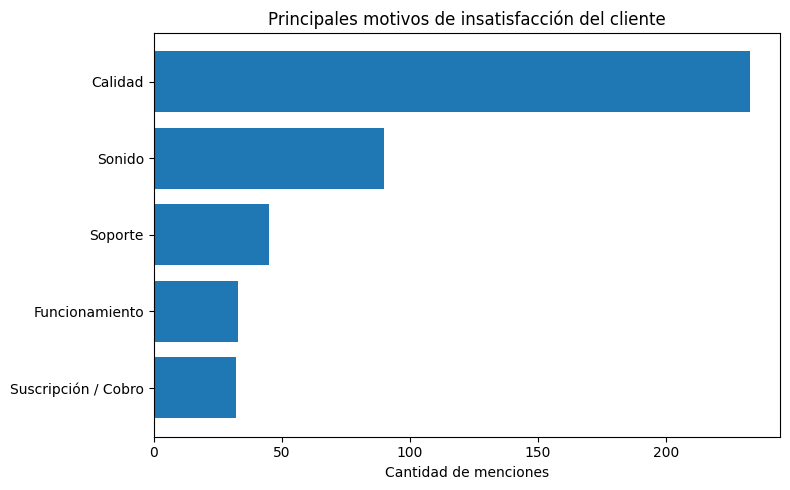

In [136]:
theme_df = (
    pd.DataFrame.from_dict(theme_freq, orient="index", columns=["Menciones"])
      .sort_values("Menciones")
)

plt.figure(figsize=(8,5))
plt.barh(theme_df.index, theme_df["Menciones"])
plt.title("Principales motivos de insatisfacción del cliente")
plt.xlabel("Cantidad de menciones")
plt.tight_layout()
plt.show()


In [137]:
bins = [-1.0, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

labels = [
    "< 0.0",
    "0.0 – 0.4",
    "0.4 – 0.5",
    "0.5 – 0.6",
    "0.6 – 0.7",
    "0.7 – 0.8",
    "0.8 – 0.9",
    "0.9 – 1.0"
]

prod_scores = product_summary["sentiment_score"]



<function matplotlib.pyplot.show(close=None, block=None)>

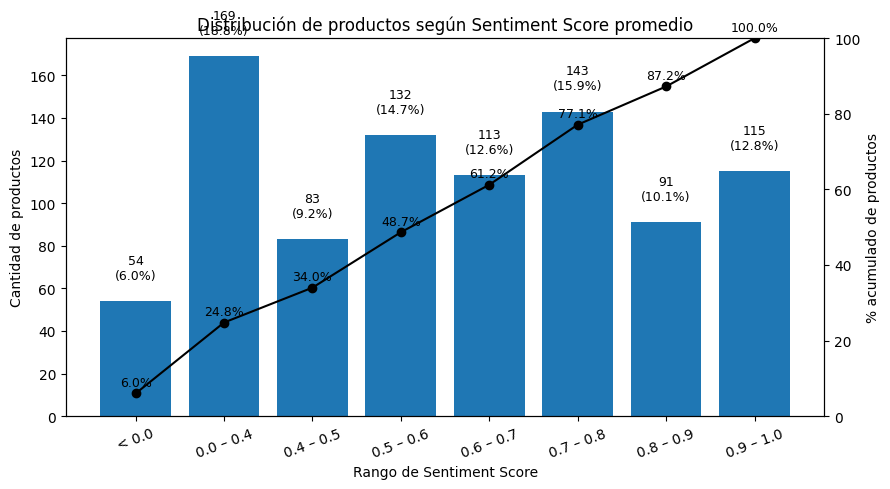

In [138]:


prod_scores = product_summary["sentiment_score"]

prod_scores_binned = pd.cut(
    prod_scores,
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

freq = prod_scores_binned.value_counts().sort_index()


total_products = freq.sum()

freq_df = (
    freq
    .to_frame(name="count")
    .assign(
        pct=lambda d: d["count"] / total_products * 100,
        pct_acum=lambda d: d["pct"].cumsum()
    )
)


fig, ax1 = plt.subplots(figsize=(9,5))

# Barras (cantidad)
ax1.bar(freq_df.index, freq_df["count"])
ax1.set_xlabel("Rango de Sentiment Score")
ax1.set_ylabel("Cantidad de productos")
ax1.set_title("Distribución de productos según Sentiment Score promedio")
ax1.tick_params(axis="x", rotation=20)

# Etiquetas: cantidad + %
for i, row in enumerate(freq_df.itertuples()):
    ax1.text(
        i,
        row.count + total_products * 0.01,
        f"{row.count}\n({row.pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Segundo eje: porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(freq_df.index, freq_df["pct_acum"], marker="o", color="black")
ax2.set_ylabel("% acumulado de productos")
ax2.set_ylim(0, 100)

# Etiquetas del acumulado
for i, v in enumerate(freq_df["pct_acum"]):
    ax2.text(
        i,
        v + 2,
        f"{v:.1f}%",
        ha="center",
        fontsize=9,
        color="black"
    )

plt.tight_layout()
plt.show



In [139]:
product_summary.sort_values("avg_rating")

,asin,n_reviews,avg_rating,pct_neg,pct_neu,pct_pos,sentiment_score
600,B0025V1REU,7,2.71,0.71,0.00,0.29,-0.43
267,B0007L8BQW,7,2.86,0.57,0.00,0.43,-0.14
723,B00466HM28,7,2.86,0.57,0.14,0.29,-0.29
545,B001GD07SK,8,2.88,0.38,0.25,0.38,0.00
534,B001E43SK0,5,3.00,0.40,0.20,0.40,0.00
...,...,...,...,...,...,...,...
594,B001W99HE8,20,5.00,0.05,0.00,0.95,0.90
593,B001V5K2S8,8,5.00,0.00,0.25,0.75,0.75
282,B0009EQOES,6,5.00,0.00,0.00,1.00,1.00
649,B0033P1O6S,10,5.00,0.00,0.20,0.80,0.80


##### Conclusión

El análisis permitió identificar los productos con peor percepción del cliente, basandonos plenamente en los reviews. Y los principales motivos de insatisfacción asociados.

El análisis basado en reviews permitió identificar los productos con peor percepción del cliente y los principales focos de insatisfacción. Se observa que un 6% de los productos presenta una percepción negativa o neutra, mientras que un 28% se ubica en una zona de percepción neutral. El 66% restante muestra una percepción positiva, incluyendo un 12,8% de productos con reviews altamente favorables.


Se identifica una oportunidad de mejora sobre el 24,8% de los productos con peor percepción del cliente. Se propone focalizar acciones sobre este grupo, utilizando los comentarios negativos como insumo para mejorar la calidad, el funcionamiento y la experiencia de soporte, con el objetivo de elevar la percepción general del catálogo.



